<h1 align="center"><b>Loan Eligibility Prediction</b></h1>













***To predict whether a customer is eligible for loan or not based on the given customer details.***

***Done by:***   
***Karthik Narayanan***   
***AM.EN.U4CSE19327***  
***S5 CSE-D***

# Import Libraries

In [ ]:
import warnings
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
%matplotlib inline

warnings.filterwarnings('ignore')

# Load CSV From Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/ML-Project

/content/gdrive/MyDrive/ML-Project


In [ ]:
df = pd.read_csv('Loan payments data-1.csv')

In [ ]:
df

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20161085,COLLECTION,1000,30,9/11/2016,10/10/2016,NaN,59.0,29,High School or Below,male
1,xqd20160435,PAIDOFF,800,15,9/12/2016,9/26/2016,9/25/2016 13:29,NaN,24,college,male
2,xqd20160944,COLLECTION,1000,15,9/11/2016,9/25/2016,NaN,74.0,23,High School or Below,male
3,xqd20160085,PAIDOFF,1000,30,9/11/2016,10/10/2016,10/10/2016 13:00,NaN,37,High School or Below,female
4,xqd20160134,PAIDOFF,1000,30,9/11/2016,10/10/2016,9/30/2016 7:12,NaN,33,college,female
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160590,PAIDOFF,800,30,9/11/2016,10/10/2016,10/10/2016 13:00,NaN,28,High School or Below,male
496,xqd20161326,COLLECTION_PAIDOFF,1000,30,9/11/2016,10/10/2016,11/4/2016 11:07,25.0,32,Bechalor,male
497,xqd20161044,COLLECTION,1000,30,9/11/2016,10/10/2016,NaN,59.0,23,High School or Below,male
498,xqd20161028,COLLECTION,1000,30,9/11/2016,11/9/2016,NaN,29.0,27,college,male


In [ ]:
df.shape

(500, 11)

#Convert to date time object

In [ ]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20161085,COLLECTION,1000,30,2016-09-11,2016-10-10,NaN,59.0,29,High School or Below,male
1,xqd20160435,PAIDOFF,800,15,2016-09-12,2016-09-26,9/25/2016 13:29,NaN,24,college,male
2,xqd20160944,COLLECTION,1000,15,2016-09-11,2016-09-25,NaN,74.0,23,High School or Below,male
3,xqd20160085,PAIDOFF,1000,30,2016-09-11,2016-10-10,10/10/2016 13:00,NaN,37,High School or Below,female
4,xqd20160134,PAIDOFF,1000,30,2016-09-11,2016-10-10,9/30/2016 7:12,NaN,33,college,female


# Data Summarisation

In [ ]:
df['loan_status'].value_counts() # getting value counts based on loan_status

PAIDOFF               314
COLLECTION_PAIDOFF     95
COLLECTION             91
Name: loan_status, dtype: int64

In [ ]:
edu_loan_data = df.groupby(['education'])['loan_status'].value_counts(normalize=True) # groupby education and also getting value counts based on loan_status
edu_loan_data

education             loan_status       
Bechalor              PAIDOFF               0.571429
                      COLLECTION_PAIDOFF    0.271429
                      COLLECTION            0.157143
High School or Below  PAIDOFF               0.636816
                      COLLECTION            0.218905
                      COLLECTION_PAIDOFF    0.144279
Master or Above       PAIDOFF               0.666667
                      COLLECTION            0.333333
college               PAIDOFF               0.637168
                      COLLECTION_PAIDOFF    0.207965
                      COLLECTION            0.154867
Name: loan_status, dtype: float64

In [ ]:
edu_loan_data.shape # to get the shape of data

(11,)

In [ ]:
df.describe() #  the type of data and its attributes such as mean

,Principal,terms,past_due_days,age
count,500.000000,500.000000,186.000000,500.000000
mean,941.600000,22.838000,34.908602,30.902000
std,119.406683,8.022498,29.242088,5.868328
min,300.000000,7.000000,1.000000,18.000000
25%,1000.000000,15.000000,3.000000,26.000000
50%,1000.000000,30.000000,29.000000,30.000000
75%,1000.000000,30.000000,59.000000,35.000000
max,1000.000000,30.000000,76.000000,50.000000


In [ ]:
df.columns # to get the column names

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender'],
      dtype='object')

In [ ]:
df.info() # to get the data types and columns information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Loan_ID         500 non-null    object        
 1   loan_status     500 non-null    object        
 2   Principal       500 non-null    int64         
 3   terms           500 non-null    int64         
 4   effective_date  500 non-null    datetime64[ns]
 5   due_date        500 non-null    datetime64[ns]
 6   paid_off_time   409 non-null    object        
 7   past_due_days   186 non-null    float64       
 8   age             500 non-null    int64         
 9   education       500 non-null    object        
 10  Gender          500 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(5)
memory usage: 43.1+ KB


# Data Visualisation and Interpretation

In [ ]:
education = list(set(df['education']))
education # contains all education labels

['High School or Below', 'college', 'Master or Above', 'Bechalor']

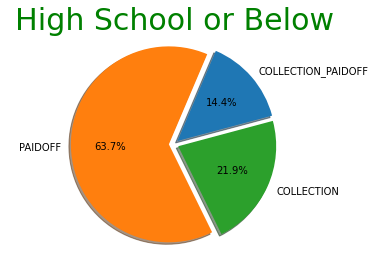

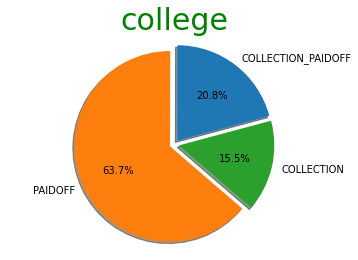

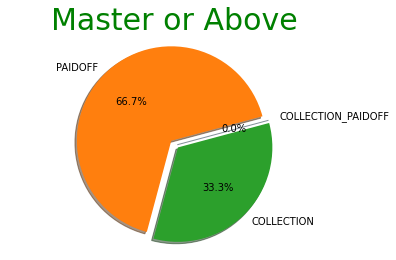

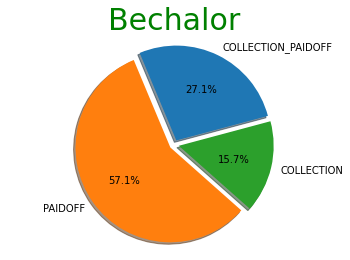

In [ ]:
loan = list(set(df['loan_status'])) 
for i in education:
    val = []
    for label in loan:
        try:
            val.append(edu_loan_data[i][label])
        except:
            val.append(0)
    my_explode = (0.05, 0.05, 0.05)
    plt.pie(val, labels=loan, autopct='%1.1f%%', startangle=15, shadow = True, explode=my_explode)
    plt.title(label=i, fontsize=30, color="green")
    plt.axis('equal')
    plt.show()
    print()

**Data Interpretation Based on Education Level:**


1. ***High School or Below***

> PAIDOFF - 63.7%  
> COLLECTION - 21.9%  
> COLLECTION_PAIDOFF - 14.4%

2. ***Bechalor***

>PAIDOFF - 57.1%   
>COLLECTION - 15.7%   
>COLLECTION_PAIDOFF - 27.1%   

3. ***College***

> PAIDOFF - 63.7%  
> COLLECTION - 15.5%  
> COLLECTION_PAIDOFF - 20.8%

4. ***Master or Above***

> PAIDOFF - 66.7%  
> COLLECTION - 33.3%  
> COLLECTION_PAIDOFF - 0.0%


In [ ]:
gender = list(set(df['Gender'])) 
gender # contains all gender labels

['male', 'female']

In [ ]:
gender_loan_data = df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
gender_loan_data # groupby gender and also getting value counts based on loan_status

Gender  loan_status       
female  PAIDOFF               0.782051
        COLLECTION_PAIDOFF    0.153846
        COLLECTION            0.064103
male    PAIDOFF               0.599526
        COLLECTION            0.203791
        COLLECTION_PAIDOFF    0.196682
Name: loan_status, dtype: float64

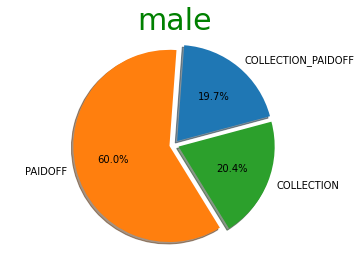

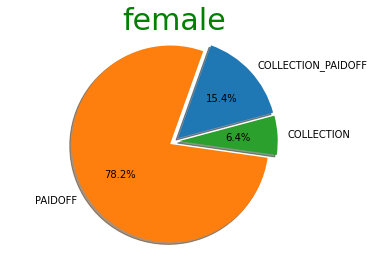

In [ ]:
for i in gender:
    val = []
    for label in loan:
        try:
            val.append(gender_loan_data[i][label])
        except:
            val.append(0)
    my_explode = (0.05, 0.05, 0.05)
    plt.pie(val, labels=loan, autopct='%1.1f%%', startangle=15, shadow = True, explode=my_explode)
    plt.title(label=i, fontsize=30, color="green")
    plt.axis('equal')
    plt.show()
    print()

**Data Interpretation Based on Gender:**


1. ***Male***

> PAIDOFF - 60.0%  
> COLLECTION - 20.4%  
> COLLECTION_PAIDOFF -19.7 %

2. ***Female***

>PAIDOFF - 78.2%   
>COLLECTION - 6.4%   
>COLLECTION_PAIDOFF - 15.4%   

In [ ]:
df_age = pd.read_csv('Loan payments data-1.csv')
mx_age, mn_age = max(df['age']), min(df['age']) # to find maximum and minimum age in the dataset

class1_size = (mx_age - mn_age) // 3
class2_size = (mx_age - mn_age) // 3
class3_size = mx_age - mn_age - (class1_size + class2_size)
# divide the dataset into three based on age
print("The size of the three divided classes are: ", class1_size, class2_size, class3_size)
print()

class1_range = [mn_age , mn_age + class1_size]
class2_range = [class1_range[-1] , class1_range[-1] + class2_size]
class3_range = [class1_range[-1] + class2_size, mx_age+1]
# these contain the range of age values in each class
print("Class 1: ", class1_range)
print("Class 2: ", class2_range)
print("Class 3: ", class3_range)
print()


for index in df_age.index:
    if class1_range[0] <= df_age.loc[index, 'age' ] < class1_range[-1]:
        df_age.loc[index, 'age'] = 'class1'
    elif  class2_range[0] <= df_age.loc[index, 'age' ] < class2_range[-1]:
        df_age.loc[index, 'age'] = 'class2'
    else:
        df_age.loc[index, 'age'] = 'class3'
# renaming the row values in age column as class names (class1/class2/class3)


age_loan_data = df_age.groupby(['age'])['loan_status'].value_counts(normalize=True)
age_loan_data
# groupby age class and also getting value counts based on loan_status

The size of the three divided classes are:  10 10 12

Class 1:  [18, 28]
Class 2:  [28, 38]
Class 3:  [38, 51]



age     loan_status       
class1  PAIDOFF               0.541176
        COLLECTION_PAIDOFF    0.247059
        COLLECTION            0.211765
class2  PAIDOFF               0.698473
        COLLECTION            0.160305
        COLLECTION_PAIDOFF    0.141221
class3  PAIDOFF               0.573529
        COLLECTION_PAIDOFF    0.235294
        COLLECTION            0.191176
Name: loan_status, dtype: float64

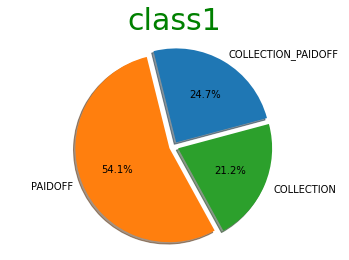

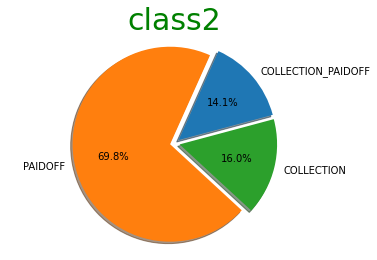

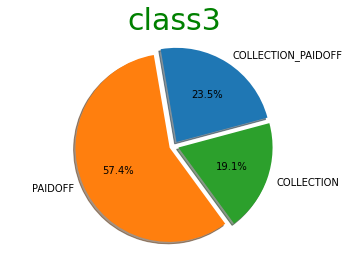

In [ ]:
age = sorted(set(df_age['age']))
collection_paidoff=[]
collection=[]
paidoff=[]
for i in age:
    val = []
    for label in loan:
        try:
            val.append(age_loan_data[i][label])
            if label == "COLLECTION_PAIDOFF":
                collection_paidoff.append(age_loan_data[i][label])
            elif label == "COLLECTION":
                collection.append(age_loan_data[i][label])
            else:
                paidoff.append(age_loan_data[i][label])
        except:
            val.append(0)
            if label == "COLLECTION_PAIDOFF":
                collection_paidoff.append(0)
            elif label == "COLLECTION":
                collection.append(0)
            else:
                paidoff.append(0)
    my_explode = (0.05, 0.05, 0.05)
    plt.pie(val, labels=loan, autopct='%1.1f%%', startangle=15, shadow = True, explode=my_explode)
    plt.title(label=i, fontsize=30, color="green")
    plt.axis('equal')
    plt.show()
    print()

**Data Interpretation Based on Age:**


1. ***Class 1***

> PAIDOFF - 54.1%  
> COLLECTION - 21.2%  
> COLLECTION_PAIDOFF - 24.7%

2. ***Class 2***

>PAIDOFF - 69.8%   
>COLLECTION - 16.0%   
>COLLECTION_PAIDOFF - 14.1%   

3. ***Class 3***

> PAIDOFF - 57.4%  
> COLLECTION - 19.1%  
> COLLECTION_PAIDOFF - 23.5%



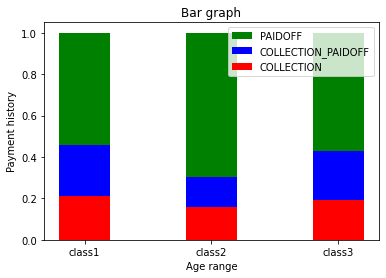

In [ ]:
ind = [x for x, _ in enumerate(age)]
paidoff = np.array(paidoff)
collection_paidoff = np.array(collection_paidoff)
collection = np.array(collection)
plt.bar(ind, paidoff, width=0.4, label='PAIDOFF', color='green', bottom=collection_paidoff+collection)
plt.bar(ind, collection_paidoff, width=0.4, label='COLLECTION_PAIDOFF', color='blue', bottom=collection)
plt.bar(ind, collection, width=0.4, label='COLLECTION', color='red')
plt.xticks(ind, age)
plt.title("Bar graph")
plt.ylabel("Payment history")
plt.xlabel("Age range")
plt.legend(loc="upper right")
plt.show()

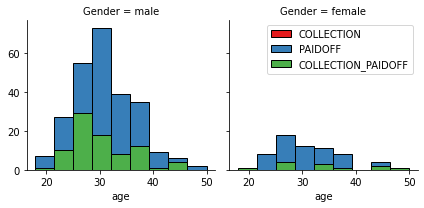

In [ ]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

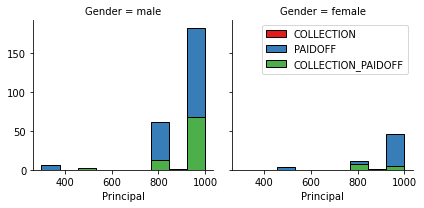

In [ ]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [ ]:
df_term = pd.read_csv('Loan payments data-1.csv')
mx_age, mn_age = max(df_term['terms']), min(df_term['terms']) # to find maximum and minimum term in the dataset


class1_size = (mx_age - mn_age) // 3
class2_size = (mx_age - mn_age) // 3
class3_size = mx_age - mn_age - (class1_size + class2_size)
# divide the dataset into three based on term
print("The size of the three divided classes are: ", class1_size, class2_size, class3_size)
print()


class1_range = [mn_age , mn_age + class1_size]
class2_range = [class1_range[-1] , class1_range[-1] + class2_size]
class3_range = [class1_range[-1] + class2_size, mx_age+1]
# these contain the range of term values in each class
print("Class 1: ", class1_range)
print("Class 2: ", class2_range)
print("Class 3: ", class3_range)
print()


for index in df_term.index:
    if class1_range[0] <= df_term.loc[index, 'terms' ] < class1_range[-1]:
        df_term.loc[index, 'terms'] = 'term1'
    elif  class2_range[0] <= df_term.loc[index, 'terms' ] < class2_range[-1]:
        df_term.loc[index, 'terms'] = 'term2'
    else:
        df_term.loc[index, 'terms'] = 'term3'
df_term
term_loan_data = df_term.groupby(['terms'])['loan_status'].value_counts(normalize=True)
term_loan_data
# groupby term class and also getting value counts based on loan_status

The size of the three divided classes are:  7 7 9

Class 1:  [7, 14]
Class 2:  [14, 21]
Class 3:  [21, 31]



terms  loan_status       
term1  PAIDOFF               0.954545
       COLLECTION_PAIDOFF    0.045455
term2  PAIDOFF               0.619512
       COLLECTION_PAIDOFF    0.204878
       COLLECTION            0.175610
term3  PAIDOFF               0.608059
       COLLECTION            0.201465
       COLLECTION_PAIDOFF    0.190476
Name: loan_status, dtype: float64

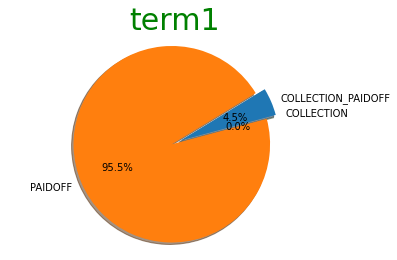

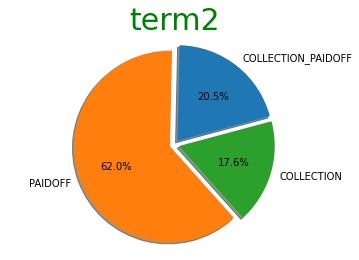

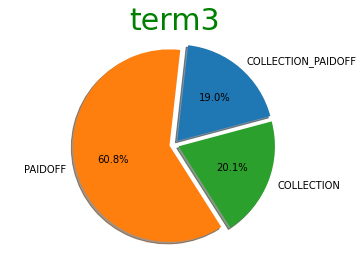

In [ ]:
term = sorted(set(df_term['terms']))
collection_paidoff=[]
collection=[]
paidoff=[]
for i in term:
    val = []
    for label in loan:
        try:
            val.append(term_loan_data[i][label])
            if label == "COLLECTION_PAIDOFF":
                collection_paidoff.append(term_loan_data[i][label])
            elif label == "COLLECTION":
                collection.append(term_loan_data[i][label])
            else:
                paidoff.append(term_loan_data[i][label])
        except:
            val.append(0)
            if label == "COLLECTION_PAIDOFF":
                collection_paidoff.append(0)
            elif label == "COLLECTION":
                collection.append(0)
            else:
                paidoff.append(0)
    my_explode = (0.05, 0.05, 0.05)
    plt.pie(val, labels=loan, autopct='%1.1f%%', startangle=15, shadow = True, explode=my_explode)
    plt.title(label=i, fontsize=30, color="green")
    plt.axis('equal')
    plt.show()
    print()

**Data Interpretation Based on Term:**


1. ***Term 1***

> PAIDOFF - 95.5%  
> COLLECTION - 0.0%  
> COLLECTION_PAIDOFF - 4.5%

2. ***Term 2***

>PAIDOFF - 62.0%   
>COLLECTION - 17.6%   
>COLLECTION_PAIDOFF - 20.5%   

3. ***Term 3***

> PAIDOFF - 60.8%  
> COLLECTION - 20.1%  
> COLLECTION_PAIDOFF - 19.0%

# Data Pre-processing

In [ ]:
X = df[['Principal','terms','age','Gender','education']] 
X.head() #features

,Principal,terms,age,Gender,education
0,1000,30,29,male,High School or Below
1,800,15,24,male,college
2,1000,15,23,male,High School or Below
3,1000,30,37,female,High School or Below
4,1000,30,33,female,college


In [ ]:
y = df['loan_status'].values # the target or result

In [ ]:
X

,Principal,terms,age,Gender,education
0,1000,30,29,male,High School or Below
1,800,15,24,male,college
2,1000,15,23,male,High School or Below
3,1000,30,37,female,High School or Below
4,1000,30,33,female,college
...,...,...,...,...,...
495,800,30,28,male,High School or Below
496,1000,30,32,male,Bechalor
497,1000,30,23,male,High School or Below
498,1000,30,27,male,college


###### Features

In [ ]:
X.loc[df['age'] > 30, 'age'] = 1
X.loc[df['age'] <= 30, 'age'] = 0
X.loc[df['Principal'] == 1000, 'Principal'] = 1
X.loc[df['Principal'] < 1000,  'Principal'] = 0
X

,Principal,terms,age,Gender,education
0,1,30,0,male,High School or Below
1,0,15,0,male,college
2,1,15,0,male,High School or Below
3,1,30,1,female,High School or Below
4,1,30,1,female,college
...,...,...,...,...,...
495,0,30,0,male,High School or Below
496,1,30,1,male,Bechalor
497,1,30,0,male,High School or Below
498,1,30,0,male,college


###### Class labels

In [ ]:
y

array(['COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION_PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF',
       'COLLECTION_PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'COLLECTION_PAIDOFF', 'PAIDOFF', 'COLLECTION_PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION_PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION_PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION_PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION_PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'COLLECTION_PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'COLLECTION_PAIDOFF', 'PAIDOFF', 'COLLECTI

##### Test-Train Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
X_train

,Principal,terms,age,Gender,education
249,0,15,0,male,college
433,1,30,0,male,college
19,0,15,1,male,college
322,0,30,1,female,college
332,0,15,1,male,High School or Below
...,...,...,...,...,...
106,1,30,0,male,college
270,0,30,0,male,college
348,0,15,1,male,Bechalor
435,0,15,1,male,college


In [ ]:
train = X_train.copy()

In [ ]:
train['loan_status'] = y_train

In [ ]:
Counter(y_train)

Counter({'COLLECTION': 70, 'COLLECTION_PAIDOFF': 83, 'PAIDOFF': 247})

In [ ]:
X_train

,Principal,terms,age,Gender,education
249,0,15,0,male,college
433,1,30,0,male,college
19,0,15,1,male,college
322,0,30,1,female,college
332,0,15,1,male,High School or Below
...,...,...,...,...,...
106,1,30,0,male,college
270,0,30,0,male,college
348,0,15,1,male,Bechalor
435,0,15,1,male,college


In [ ]:
train

,Principal,terms,age,Gender,education,loan_status
249,0,15,0,male,college,PAIDOFF
433,1,30,0,male,college,PAIDOFF
19,0,15,1,male,college,PAIDOFF
322,0,30,1,female,college,COLLECTION_PAIDOFF
332,0,15,1,male,High School or Below,COLLECTION_PAIDOFF
...,...,...,...,...,...,...
106,1,30,0,male,college,PAIDOFF
270,0,30,0,male,college,PAIDOFF
348,0,15,1,male,Bechalor,COLLECTION_PAIDOFF
435,0,15,1,male,college,COLLECTION_PAIDOFF


# Decision Tree

### Entropy Calculation

In [ ]:
def entropy(a):
    if len(a) == 0:
        return 0
    return -np.sum([i*np.log2(i) for i in np.array(list(Counter(a).values()))/len(a)])

### Information Gain

In [ ]:
def infogain_terms(train,need=0):
    entropy_parent = entropy(train["loan_status"])
    split_terms_seven = train[train['terms'] == 7]
    split_terms_fifteen = train[train['terms'] ==15]
    split_terms_thirty = train[train['terms'] ==30]
    info_gain_terms = entropy_parent - ((len(split_terms_seven)/len(train)) *entropy(split_terms_seven['loan_status']) + 
                                     (len(split_terms_fifteen)/len(train))*entropy(split_terms_fifteen['loan_status'])+
                                    (len(split_terms_thirty)/len(train))*entropy(split_terms_thirty['loan_status']))
    if need == 1:
        return split_terms_seven, split_terms_fifteen, split_terms_thirty
    return info_gain_terms

In [ ]:
def infogain_gender(train,need=0):
    entropy_parent = entropy(train["loan_status"])
    split_gender_male = train[train['Gender'] == "male"]
    split_gender_female = train[train['Gender'] == "female"]
    info_gain_gender = entropy_parent - ((len(split_gender_male)/len(train)) *entropy(split_gender_male['loan_status']) 
                                         + (len(split_gender_female)/len(train))*entropy(split_gender_female['loan_status']))
    if need == 1:
        return split_gender_male, split_gender_female 
    return info_gain_gender

In [ ]:
def infogain_principal(train,need=0):
    entropy_parent = entropy(train["loan_status"])
    split_principal_0 = train[train['Principal'] == 0]
    split_principal_1 = train[train['Principal'] == 1]
    info_gain_principal = entropy_parent - (((len(split_principal_0)/len(train)) *entropy(split_principal_0['loan_status'])) + 
                                         ((len(split_principal_1)/len(train))*entropy(split_principal_1['loan_status'])))
    if need == 1:
        return split_principal_0, split_principal_1
    return info_gain_principal

In [ ]:
def infogain_age(train,need=0):
    entropy_parent = entropy(train["loan_status"])
    split_age_0 = train[train['age'] == 0]
    split_age_1 = train[train['age'] == 1]
    info_gain_age = entropy_parent - (((len(split_age_0)/len(train)) *entropy(split_age_0['loan_status'])) + 
                                         ((len(split_age_1)/len(train))*entropy(split_age_1['loan_status'])))
    if need == 1:
        return split_age_0, split_age_1
    return info_gain_age

In [ ]:
def infogain_education(train,need=0):
    entropy_parent = entropy(train["loan_status"])
    split_edu_college = train[train['education'] == 'college']
    split_edu_bechalor = train[train['education'] =='Bechalor']
    split_edu_master = train[train['education'] =='Master or Above']
    split_edu_high = train[train['education'] =='High School or Below']
    info_gain_education = entropy_parent - ((len(split_edu_college)/len(train)) *entropy(split_edu_college['loan_status']) + 
                                         (len(split_edu_bechalor)/len(train))*entropy(split_edu_bechalor['loan_status'])+
                                        (len(split_edu_master)/len(train))*entropy(split_edu_master['loan_status'])+
                                          (len(split_edu_high)/len(train))*entropy(split_edu_high['loan_status']))
    if need == 1:
        return split_edu_college, split_edu_bechalor, split_edu_master,split_edu_high
    return info_gain_education

### Function to check where all samples belong to the same class

In [ ]:
def ispure(train):
    if len(set(train['loan_status'])) == 1:
        return 1
    return 0

### Information Gain statistics

In [ ]:
def infogain_dataframe(train):
    d = {"term":infogain_terms(train),"gender":infogain_gender(train),"principal":infogain_principal(train),"age":infogain_age(train),"education":infogain_education(train)}
    display(pd.DataFrame(sorted(d.items())))

In [ ]:
infogain_dataframe(train)

,0,1
0,age,0.001084
1,education,0.015750
2,gender,0.011109
3,principal,0.003704
4,term,0.018108


In [ ]:
term7,term15,term30=infogain_terms(train,1)

In [ ]:
term7

,Principal,terms,age,Gender,education,loan_status
113,1,7,1,male,college,PAIDOFF
265,1,7,1,male,college,PAIDOFF
318,1,7,0,male,college,PAIDOFF
108,0,7,0,male,High School or Below,PAIDOFF
272,1,7,0,male,college,PAIDOFF
111,1,7,1,male,High School or Below,PAIDOFF
416,1,7,0,male,High School or Below,PAIDOFF
147,0,7,1,female,Bechalor,COLLECTION_PAIDOFF
96,1,7,0,male,college,PAIDOFF
386,1,7,0,male,High School or Below,PAIDOFF


In [ ]:
ispure(term7)

0

In [ ]:
set(term7['education'])

{'Bechalor', 'High School or Below', 'college'}

In [ ]:
infogain_dataframe(term7)

,0,1
0,age,0.093350
1,education,0.353359
2,gender,0.220026
3,principal,0.137019
4,term,0.000000


In [ ]:
term7_college,term7_bechalor,term7_master,term7_high=infogain_education(term7,1)

In [ ]:
term7_college

,Principal,terms,age,Gender,education,loan_status
113,1,7,1,male,college,PAIDOFF
265,1,7,1,male,college,PAIDOFF
318,1,7,0,male,college,PAIDOFF
272,1,7,0,male,college,PAIDOFF
96,1,7,0,male,college,PAIDOFF
52,1,7,0,male,college,PAIDOFF
134,1,7,0,female,college,PAIDOFF
187,0,7,1,male,college,PAIDOFF
252,0,7,1,male,college,PAIDOFF
308,1,7,0,male,college,PAIDOFF


In [ ]:
ispure(term7_college)

1

In [ ]:
# this dataset contains only PAIDOFF, therefore its pure. So we can come to a rule that :
# if term is 7 and education is college the loan_status is PAIDOFF

In [ ]:
term7_bechalor

,Principal,terms,age,Gender,education,loan_status
147,0,7,1,female,Bechalor,COLLECTION_PAIDOFF


In [ ]:
ispure(term7_bechalor)

1

In [ ]:
# this dataset contains only COLLECTION_PAIDOFF, therefore its pure. So we can come to a rule that :
# if term is 7 and education is bechalor the loan_status is COLLECTION_PAIDOFF

In [ ]:
term7_master

,Principal,terms,age,Gender,education,loan_status


In [ ]:
ispure(term7_master)

0

In [ ]:
# since this is a rare case we are assumin that :
# if term is 7 and education is master then loan_status is PAIDOFF

In [ ]:
term7_high

,Principal,terms,age,Gender,education,loan_status
108,0,7,0,male,High School or Below,PAIDOFF
111,1,7,1,male,High School or Below,PAIDOFF
416,1,7,0,male,High School or Below,PAIDOFF
386,1,7,0,male,High School or Below,PAIDOFF


In [ ]:
ispure(term7_high)

1

In [ ]:
# this dataset contains only PAIDOFF, therefore its pure. So we can come to a rule that :
# if term is 7 and education is high the loan_status is PAIDOFF

In [ ]:
term15

,Principal,terms,age,Gender,education,loan_status
249,0,15,0,male,college,PAIDOFF
19,0,15,1,male,college,PAIDOFF
332,0,15,1,male,High School or Below,COLLECTION_PAIDOFF
301,1,15,0,female,High School or Below,COLLECTION
229,1,15,0,male,college,COLLECTION_PAIDOFF
...,...,...,...,...,...,...
466,1,15,1,male,High School or Below,PAIDOFF
499,1,15,1,male,High School or Below,PAIDOFF
20,0,15,0,male,High School or Below,PAIDOFF
348,0,15,1,male,Bechalor,COLLECTION_PAIDOFF


In [ ]:
ispure(term15)

0

In [ ]:
infogain_dataframe(term15)

,0,1
0,age,0.002153
1,education,0.040618
2,gender,0.015395
3,principal,0.017838
4,term,0.000000


In [ ]:
term15_college,term15_bechalor,term15_master,term15_high=infogain_education(term15,1)

In [ ]:
term15_college

,Principal,terms,age,Gender,education,loan_status
249,0,15,0,male,college,PAIDOFF
19,0,15,1,male,college,PAIDOFF
229,1,15,0,male,college,COLLECTION_PAIDOFF
132,0,15,0,male,college,PAIDOFF
423,1,15,0,male,college,PAIDOFF
...,...,...,...,...,...,...
293,1,15,0,male,college,COLLECTION_PAIDOFF
413,1,15,1,male,college,PAIDOFF
257,1,15,0,male,college,PAIDOFF
372,0,15,0,female,college,PAIDOFF


In [ ]:
ispure(term15_college)

0

In [ ]:
infogain_dataframe(term15_college)

,0,1
0,age,0.054963
1,education,0.000000
2,gender,0.030335
3,principal,0.014035
4,term,0.000000


In [ ]:
term15_college_age0,term15_college_age1=infogain_age(term15_college,1)

In [ ]:
term15_college_age0

,Principal,terms,age,Gender,education,loan_status
249,0,15,0,male,college,PAIDOFF
229,1,15,0,male,college,COLLECTION_PAIDOFF
132,0,15,0,male,college,PAIDOFF
423,1,15,0,male,college,PAIDOFF
25,1,15,0,male,college,PAIDOFF
42,1,15,0,male,college,COLLECTION
176,1,15,0,male,college,COLLECTION
329,0,15,0,male,college,COLLECTION
17,1,15,0,male,college,PAIDOFF
208,1,15,0,male,college,COLLECTION_PAIDOFF


In [ ]:
ispure(term15_college_age0)

0

In [ ]:
infogain_dataframe(term15_college_age0)

,0,1
0,age,0.000000
1,education,0.000000
2,gender,0.050100
3,principal,0.089905
4,term,0.000000


In [ ]:
term15_college_age0_principal0,term15_college_age0_principal1=infogain_principal(term15_college_age0,1)

In [ ]:
term15_college_age0_principal0

,Principal,terms,age,Gender,education,loan_status
249,0,15,0,male,college,PAIDOFF
132,0,15,0,male,college,PAIDOFF
329,0,15,0,male,college,COLLECTION
199,0,15,0,male,college,PAIDOFF
274,0,15,0,male,college,PAIDOFF
184,0,15,0,male,college,PAIDOFF
487,0,15,0,female,college,PAIDOFF
186,0,15,0,male,college,PAIDOFF
260,0,15,0,male,college,COLLECTION
279,0,15,0,female,college,PAIDOFF


In [ ]:
ispure(term15_college_age0_principal0)

0

In [ ]:
infogain_dataframe(term15_college_age0_principal0)

,0,1
0,age,0.000000
1,education,0.000000
2,gender,0.076321
3,principal,0.000000
4,term,0.000000


In [ ]:
term15_college_age0_principal0_male,term15_college_age0_principal0_female=infogain_gender(term15_college_age0_principal0,1)

In [ ]:
term15_college_age0_principal0_female

,Principal,terms,age,Gender,education,loan_status
487,0,15,0,female,college,PAIDOFF
279,0,15,0,female,college,PAIDOFF
427,0,15,0,female,college,PAIDOFF
372,0,15,0,female,college,PAIDOFF


In [ ]:
ispure(term15_college_age0_principal0_female)

1

In [ ]:
# since this dataset only contains PAIDOFF , therfore its pure . So we can come to a rule that :
# if term is 15 and education is college and age is 0 (<30) and princiapl is 0 (<1000) and gender is female then loan_status is PAIDOFF

In [ ]:
term15_college_age0_principal0_male

,Principal,terms,age,Gender,education,loan_status
249,0,15,0,male,college,PAIDOFF
132,0,15,0,male,college,PAIDOFF
329,0,15,0,male,college,COLLECTION
199,0,15,0,male,college,PAIDOFF
274,0,15,0,male,college,PAIDOFF
184,0,15,0,male,college,PAIDOFF
186,0,15,0,male,college,PAIDOFF
260,0,15,0,male,college,COLLECTION
457,0,15,0,male,college,COLLECTION
1,0,15,0,male,college,PAIDOFF


In [ ]:
ispure(term15_college_age0_principal0_male)

0

In [ ]:
# since majority is PAIDOFF we assume that loan_status is PAIDOFF

In [ ]:
term15_college_age0_principal1

,Principal,terms,age,Gender,education,loan_status
229,1,15,0,male,college,COLLECTION_PAIDOFF
423,1,15,0,male,college,PAIDOFF
25,1,15,0,male,college,PAIDOFF
42,1,15,0,male,college,COLLECTION
176,1,15,0,male,college,COLLECTION
17,1,15,0,male,college,PAIDOFF
208,1,15,0,male,college,COLLECTION_PAIDOFF
7,1,15,0,male,college,PAIDOFF
375,1,15,0,male,college,PAIDOFF
353,1,15,0,male,college,PAIDOFF


In [ ]:
ispure(term15_college_age0_principal1)

0

In [ ]:
infogain_dataframe(term15_college_age0_principal1)

,0,1
0,age,0.000000
1,education,0.000000
2,gender,0.035299
3,principal,0.000000
4,term,0.000000


In [ ]:
term15_college_age0_principal1_male,term15_college_age0_principal1_female=infogain_gender(term15_college_age0_principal1,1)

In [ ]:
term15_college_age0_principal1_female

,Principal,terms,age,Gender,education,loan_status
382,1,15,0,female,college,COLLECTION_PAIDOFF
215,1,15,0,female,college,PAIDOFF
53,1,15,0,female,college,PAIDOFF
339,1,15,0,female,college,PAIDOFF


In [ ]:
ispure(term15_college_age0_principal1_female)

0

In [ ]:
# since majority is PAIDOFF we assume loan_status is PAIDOFF

In [ ]:
term15_college_age0_principal1_male

,Principal,terms,age,Gender,education,loan_status
229,1,15,0,male,college,COLLECTION_PAIDOFF
423,1,15,0,male,college,PAIDOFF
25,1,15,0,male,college,PAIDOFF
42,1,15,0,male,college,COLLECTION
176,1,15,0,male,college,COLLECTION
17,1,15,0,male,college,PAIDOFF
208,1,15,0,male,college,COLLECTION_PAIDOFF
7,1,15,0,male,college,PAIDOFF
375,1,15,0,male,college,PAIDOFF
353,1,15,0,male,college,PAIDOFF


In [ ]:
Counter(term15_college_age0_principal1_male['loan_status'])

Counter({'COLLECTION': 6, 'COLLECTION_PAIDOFF': 6, 'PAIDOFF': 18})

In [ ]:
ispure(term15_college_age0_principal1_male)

0

In [ ]:
# since majority is PAIDOFF we assume loan_status is PAIDOFF

In [ ]:
term15_college_age1

,Principal,terms,age,Gender,education,loan_status
19,0,15,1,male,college,PAIDOFF
266,1,15,1,male,college,PAIDOFF
261,1,15,1,male,college,COLLECTION_PAIDOFF
110,0,15,1,male,college,PAIDOFF
118,1,15,1,male,college,COLLECTION
399,1,15,1,male,college,PAIDOFF
81,1,15,1,male,college,PAIDOFF
246,1,15,1,male,college,PAIDOFF
125,1,15,1,male,college,PAIDOFF
129,1,15,1,male,college,PAIDOFF


In [ ]:
ispure(term15_college_age1)

0

In [ ]:
infogain_dataframe(term15_college_age1)

,0,1
0,age,0.000000
1,education,0.000000
2,gender,0.011779
3,principal,0.029819
4,term,0.000000


In [ ]:
term15_college_age1_principal0,term15_college_age1_principal1=infogain_principal(term15_college_age1,1)

In [ ]:
term15_college_age1_principal0

,Principal,terms,age,Gender,education,loan_status
19,0,15,1,male,college,PAIDOFF
110,0,15,1,male,college,PAIDOFF
288,0,15,1,male,college,PAIDOFF
366,0,15,1,male,college,PAIDOFF
264,0,15,1,male,college,COLLECTION_PAIDOFF
169,0,15,1,female,college,COLLECTION_PAIDOFF
435,0,15,1,male,college,COLLECTION_PAIDOFF


In [ ]:
ispure(term15_college_age1_principal0)

0

In [ ]:
infogain_dataframe(term15_college_age1_principal0)

,0,1
0,age,0.000000
1,education,0.000000
2,gender,0.198117
3,principal,0.000000
4,term,0.000000


In [ ]:
term15_college_age1_principal0_male,term15_college_age1_principal0_female=infogain_gender(term15_college_age1_principal0,1)

In [ ]:
term15_college_age1_principal0_female

,Principal,terms,age,Gender,education,loan_status
169,0,15,1,female,college,COLLECTION_PAIDOFF


In [ ]:
ispure(term15_college_age1_principal0_female)

1

In [ ]:
# since this dataset only contains COLLECTION_PAIDOFF , therfore its pure . So we can come to a rule that :
# if term is 15 and education is college and age is 1 (>30) and princiapl is 0 (<1000) and gender is female then loan_status is COLLECTION_PAIDOFF

In [ ]:
term15_college_age1_principal0_male

,Principal,terms,age,Gender,education,loan_status
19,0,15,1,male,college,PAIDOFF
110,0,15,1,male,college,PAIDOFF
288,0,15,1,male,college,PAIDOFF
366,0,15,1,male,college,PAIDOFF
264,0,15,1,male,college,COLLECTION_PAIDOFF
435,0,15,1,male,college,COLLECTION_PAIDOFF


In [ ]:
ispure(term15_college_age1_principal0_male)

0

In [ ]:
# since majority is PAIDOFF we assume loan_status is PAIDOFF

In [ ]:
term15_college_age1_principal1

,Principal,terms,age,Gender,education,loan_status
266,1,15,1,male,college,PAIDOFF
261,1,15,1,male,college,COLLECTION_PAIDOFF
118,1,15,1,male,college,COLLECTION
399,1,15,1,male,college,PAIDOFF
81,1,15,1,male,college,PAIDOFF
246,1,15,1,male,college,PAIDOFF
125,1,15,1,male,college,PAIDOFF
129,1,15,1,male,college,PAIDOFF
421,1,15,1,male,college,PAIDOFF
98,1,15,1,male,college,PAIDOFF


In [ ]:
ispure(term15_college_age1_principal1)

0

In [ ]:
infogain_dataframe(term15_college_age1_principal1)

,0,1
0,age,0.000000
1,education,0.000000
2,gender,0.038377
3,principal,0.000000
4,term,0.000000


In [ ]:
term15_college_age1_principal1_male,term15_college_age1_principal1_female=infogain_gender(term15_college_age1_principal1,1)

In [ ]:
term15_college_age1_principal1_female

,Principal,terms,age,Gender,education,loan_status
48,1,15,1,female,college,PAIDOFF


In [ ]:
ispure(term15_college_age1_principal1_female)

1

In [ ]:
# since this dataset only contains PAIDOFF , therfore its pure . So we can come to a rule that :
# if term is 15 and education is college and age is 1 (>30) and princiapl is 1 (=1000) and gender is female then loan_status is PAIDOFF

In [ ]:
term15_college_age1_principal1_male

,Principal,terms,age,Gender,education,loan_status
266,1,15,1,male,college,PAIDOFF
261,1,15,1,male,college,COLLECTION_PAIDOFF
118,1,15,1,male,college,COLLECTION
399,1,15,1,male,college,PAIDOFF
81,1,15,1,male,college,PAIDOFF
246,1,15,1,male,college,PAIDOFF
125,1,15,1,male,college,PAIDOFF
129,1,15,1,male,college,PAIDOFF
421,1,15,1,male,college,PAIDOFF
98,1,15,1,male,college,PAIDOFF


In [ ]:
ispure(term15_college_age1_principal1_male)

0

In [ ]:
# since majority is PAIDOFF we assume loan_status is PAIDOFF

In [ ]:
term15_master

,Principal,terms,age,Gender,education,loan_status
442,1,15,1,male,Master or Above,COLLECTION


In [ ]:
ispure(term15_master)

1

In [ ]:
# since this dataset only contains COLLECTION , therfore its pure . So we can come to a rule that :
# if term is 15 and education is master then loan_status is COLLECTION

In [ ]:
term15_bechalor

,Principal,terms,age,Gender,education,loan_status
203,0,15,1,male,Bechalor,COLLECTION_PAIDOFF
24,1,15,0,male,Bechalor,COLLECTION_PAIDOFF
23,1,15,0,male,Bechalor,PAIDOFF
462,1,15,1,male,Bechalor,PAIDOFF
390,1,15,1,male,Bechalor,PAIDOFF
299,0,15,0,male,Bechalor,PAIDOFF
89,0,15,1,male,Bechalor,PAIDOFF
150,1,15,0,male,Bechalor,COLLECTION_PAIDOFF
167,1,15,1,male,Bechalor,PAIDOFF
289,0,15,1,female,Bechalor,COLLECTION_PAIDOFF


In [ ]:
infogain_dataframe(term15_bechalor)

,0,1
0,age,0.053428
1,education,0.000000
2,gender,0.069123
3,principal,0.118928
4,term,0.000000


In [ ]:
term15_bechalor_principal0,term15_bechalor_principal1=infogain_principal(term15_bechalor,1)

In [ ]:
term15_bechalor_principal0

,Principal,terms,age,Gender,education,loan_status
203,0,15,1,male,Bechalor,COLLECTION_PAIDOFF
299,0,15,0,male,Bechalor,PAIDOFF
89,0,15,1,male,Bechalor,PAIDOFF
289,0,15,1,female,Bechalor,COLLECTION_PAIDOFF
40,0,15,1,male,Bechalor,PAIDOFF
236,0,15,1,male,Bechalor,PAIDOFF
149,0,15,1,male,Bechalor,PAIDOFF
348,0,15,1,male,Bechalor,COLLECTION_PAIDOFF


In [ ]:
ispure(term15_bechalor_principal0)

0

In [ ]:
infogain_dataframe(term15_bechalor_principal0)

,0,1
0,age,0.092359
1,education,0.000000
2,gender,0.199204
3,principal,0.000000
4,term,0.000000


In [ ]:
term15_bechalor_principal0_male,term15_bechalor_principal0_female=infogain_gender(term15_bechalor_principal0,1)

In [ ]:
term15_bechalor_principal0_female

,Principal,terms,age,Gender,education,loan_status
289,0,15,1,female,Bechalor,COLLECTION_PAIDOFF


In [ ]:
ispure(term15_bechalor_principal0_female)

1

In [ ]:
# since this dataset only contains COLLECTION_PAIDOFF , therfore its pure . So we can come to a rule that :
# if term is 15 and education is bechalor and principal is 0(<1000) and gender is female then loan_status is COLLECTION_PAIDOFF

In [ ]:
term15_bechalor_principal0_male

,Principal,terms,age,Gender,education,loan_status
203,0,15,1,male,Bechalor,COLLECTION_PAIDOFF
299,0,15,0,male,Bechalor,PAIDOFF
89,0,15,1,male,Bechalor,PAIDOFF
40,0,15,1,male,Bechalor,PAIDOFF
236,0,15,1,male,Bechalor,PAIDOFF
149,0,15,1,male,Bechalor,PAIDOFF
348,0,15,1,male,Bechalor,COLLECTION_PAIDOFF


In [ ]:
ispure(term15_bechalor_principal0_male)

0

In [ ]:
infogain_dataframe(term15_bechalor_principal0_male)

,0,1
0,age,0.07601
1,education,0.00000
2,gender,0.00000
3,principal,0.00000
4,term,0.00000


In [ ]:
term15_bechalor_principal0_male_age0,term15_bechalor_principal0_male_age1=infogain_age(term15_bechalor_principal0_male,1)

In [ ]:
term15_bechalor_principal0_male_age0

,Principal,terms,age,Gender,education,loan_status
299,0,15,0,male,Bechalor,PAIDOFF


In [ ]:
ispure(term15_bechalor_principal0_male_age0)

1

In [ ]:
# since this dataset only contains PAIDOFF , therfore its pure . So we can come to a rule that :
# if term is 15 and education is bechalor and principal is 0(<1000) and gender is male and age is 0(<30) then loan_status is PAIDOFF

In [ ]:
term15_bechalor_principal0_male_age1

,Principal,terms,age,Gender,education,loan_status
203,0,15,1,male,Bechalor,COLLECTION_PAIDOFF
89,0,15,1,male,Bechalor,PAIDOFF
40,0,15,1,male,Bechalor,PAIDOFF
236,0,15,1,male,Bechalor,PAIDOFF
149,0,15,1,male,Bechalor,PAIDOFF
348,0,15,1,male,Bechalor,COLLECTION_PAIDOFF


In [ ]:
# since majority is PAIDOFF we assume loan_status is PAIDOFF

In [ ]:
term15_bechalor_principal1

,Principal,terms,age,Gender,education,loan_status
24,1,15,0,male,Bechalor,COLLECTION_PAIDOFF
23,1,15,0,male,Bechalor,PAIDOFF
462,1,15,1,male,Bechalor,PAIDOFF
390,1,15,1,male,Bechalor,PAIDOFF
150,1,15,0,male,Bechalor,COLLECTION_PAIDOFF
167,1,15,1,male,Bechalor,PAIDOFF
396,1,15,0,male,Bechalor,COLLECTION
233,1,15,0,male,Bechalor,COLLECTION_PAIDOFF
342,1,15,1,male,Bechalor,COLLECTION
213,1,15,0,male,Bechalor,COLLECTION


In [ ]:
infogain_dataframe(term15_bechalor_principal1)

,0,1
0,age,0.098215
1,education,0.000000
2,gender,0.000000
3,principal,0.000000
4,term,0.000000


In [ ]:
term15_bechalor_principal1_age0,term15_bechalor_principal1_age1=infogain_age(term15_bechalor_principal1,1)

In [ ]:
term15_bechalor_principal1_age1

,Principal,terms,age,Gender,education,loan_status
462,1,15,1,male,Bechalor,PAIDOFF
390,1,15,1,male,Bechalor,PAIDOFF
167,1,15,1,male,Bechalor,PAIDOFF
342,1,15,1,male,Bechalor,COLLECTION
445,1,15,1,male,Bechalor,COLLECTION_PAIDOFF


In [ ]:
ispure(term15_bechalor_principal1_age1)

0

In [ ]:
# since majority is PAIDOFF we assume loan_status is PAIDOFF

In [ ]:
term15_bechalor_principal1_age0

,Principal,terms,age,Gender,education,loan_status
24,1,15,0,male,Bechalor,COLLECTION_PAIDOFF
23,1,15,0,male,Bechalor,PAIDOFF
150,1,15,0,male,Bechalor,COLLECTION_PAIDOFF
396,1,15,0,male,Bechalor,COLLECTION
233,1,15,0,male,Bechalor,COLLECTION_PAIDOFF
213,1,15,0,male,Bechalor,COLLECTION
350,1,15,0,male,Bechalor,COLLECTION_PAIDOFF
389,1,15,0,male,Bechalor,PAIDOFF


In [ ]:
ispure(term15_bechalor_principal1_age0)

0

In [ ]:
# since majority is COLLECTION_PAIDOFF we assume loan_status is COLLECTION_PAIDOFF

In [ ]:
term15_high

,Principal,terms,age,Gender,education,loan_status
332,0,15,1,male,High School or Below,COLLECTION_PAIDOFF
301,1,15,0,female,High School or Below,COLLECTION
331,0,15,1,male,High School or Below,PAIDOFF
464,0,15,0,male,High School or Below,PAIDOFF
281,1,15,0,male,High School or Below,COLLECTION
...,...,...,...,...,...,...
130,1,15,0,male,High School or Below,COLLECTION
214,0,15,1,female,High School or Below,PAIDOFF
466,1,15,1,male,High School or Below,PAIDOFF
499,1,15,1,male,High School or Below,PAIDOFF


In [ ]:
infogain_dataframe(term15_high)

,0,1
0,age,0.015388
1,education,0.000000
2,gender,0.043604
3,principal,0.022467
4,term,0.000000


In [ ]:
term15_high_male,term15_high_female=infogain_gender(term15_high,1)

In [ ]:
term15_high_female

,Principal,terms,age,Gender,education,loan_status
301,1,15,0,female,High School or Below,COLLECTION
373,1,15,0,female,High School or Below,PAIDOFF
296,1,15,1,female,High School or Below,PAIDOFF
97,1,15,0,female,High School or Below,PAIDOFF
349,0,15,1,female,High School or Below,PAIDOFF
425,0,15,1,female,High School or Below,PAIDOFF
319,1,15,1,female,High School or Below,PAIDOFF
214,0,15,1,female,High School or Below,PAIDOFF


In [ ]:
infogain_dataframe(term15_high_female)

,0,1
0,age,0.199204
1,education,0.000000
2,gender,0.000000
3,principal,0.092359
4,term,0.000000


In [ ]:
term15_high_female_age0,term15_high_female_age1=infogain_age(term15_high_female,1)

In [ ]:
term15_high_female_age1

,Principal,terms,age,Gender,education,loan_status
296,1,15,1,female,High School or Below,PAIDOFF
349,0,15,1,female,High School or Below,PAIDOFF
425,0,15,1,female,High School or Below,PAIDOFF
319,1,15,1,female,High School or Below,PAIDOFF
214,0,15,1,female,High School or Below,PAIDOFF


In [ ]:
ispure(term15_high_female_age1)

1

In [ ]:
# since this dataset only contains PAIDOFF , therfore its pure . So we can come to a rule that :
# if term is 15 and education is high and gender is female and age is 1(>30) then loan_status is PAIDOFF

In [ ]:
term15_high_female_age0

,Principal,terms,age,Gender,education,loan_status
301,1,15,0,female,High School or Below,COLLECTION
373,1,15,0,female,High School or Below,PAIDOFF
97,1,15,0,female,High School or Below,PAIDOFF


In [ ]:
ispure(term15_high_female_age0)

0

In [ ]:
# since majority is PAIDOFF we assume loan_status is PAIDOFF

In [ ]:
term15_high_male

,Principal,terms,age,Gender,education,loan_status
332,0,15,1,male,High School or Below,COLLECTION_PAIDOFF
331,0,15,1,male,High School or Below,PAIDOFF
464,0,15,0,male,High School or Below,PAIDOFF
281,1,15,0,male,High School or Below,COLLECTION
237,0,15,1,male,High School or Below,PAIDOFF
470,1,15,1,male,High School or Below,COLLECTION
271,1,15,0,male,High School or Below,COLLECTION_PAIDOFF
192,1,15,0,male,High School or Below,PAIDOFF
94,0,15,1,male,High School or Below,COLLECTION_PAIDOFF
218,0,15,0,male,High School or Below,PAIDOFF


In [ ]:
infogain_dataframe(term15_high_male)

,0,1
0,age,0.026196
1,education,0.000000
2,gender,0.000000
3,principal,0.016857
4,term,0.000000


In [ ]:
term15_high_male_age0,term15_high_male_age1=infogain_age(term15_high_male,1)

In [ ]:
term15_high_male_age0

,Principal,terms,age,Gender,education,loan_status
464,0,15,0,male,High School or Below,PAIDOFF
281,1,15,0,male,High School or Below,COLLECTION
271,1,15,0,male,High School or Below,COLLECTION_PAIDOFF
192,1,15,0,male,High School or Below,PAIDOFF
218,0,15,0,male,High School or Below,PAIDOFF
437,1,15,0,male,High School or Below,PAIDOFF
37,1,15,0,male,High School or Below,COLLECTION_PAIDOFF
489,1,15,0,male,High School or Below,PAIDOFF
114,1,15,0,male,High School or Below,PAIDOFF
404,0,15,0,male,High School or Below,COLLECTION_PAIDOFF


In [ ]:
infogain_dataframe(term15_high_male_age0)

,0,1
0,age,0.000000
1,education,0.000000
2,gender,0.000000
3,principal,0.059735
4,term,0.000000


In [ ]:
term15_high_male_age0_principal0,term15_high_male_age0_principal1=infogain_principal(term15_high_male_age0,1)

In [ ]:
term15_high_male_age0_principal0

,Principal,terms,age,Gender,education,loan_status
464,0,15,0,male,High School or Below,PAIDOFF
218,0,15,0,male,High School or Below,PAIDOFF
404,0,15,0,male,High School or Below,COLLECTION_PAIDOFF
420,0,15,0,male,High School or Below,PAIDOFF
383,0,15,0,male,High School or Below,PAIDOFF
20,0,15,0,male,High School or Below,PAIDOFF


In [ ]:
# since majority is PAIDOFF we assume loan_status is PAIDOFF

In [ ]:
term15_high_male_age0_principal1

,Principal,terms,age,Gender,education,loan_status
281,1,15,0,male,High School or Below,COLLECTION
271,1,15,0,male,High School or Below,COLLECTION_PAIDOFF
192,1,15,0,male,High School or Below,PAIDOFF
437,1,15,0,male,High School or Below,PAIDOFF
37,1,15,0,male,High School or Below,COLLECTION_PAIDOFF
489,1,15,0,male,High School or Below,PAIDOFF
114,1,15,0,male,High School or Below,PAIDOFF
275,1,15,0,male,High School or Below,PAIDOFF
478,1,15,0,male,High School or Below,PAIDOFF
6,1,15,0,male,High School or Below,PAIDOFF


In [ ]:
Counter(term15_high_male_age0_principal1['loan_status'])

Counter({'COLLECTION': 5, 'COLLECTION_PAIDOFF': 6, 'PAIDOFF': 15})

In [ ]:
# since majority is PAIDOFF we assume loan_status is PAIDOFF

In [ ]:
term15_high_male_age1

,Principal,terms,age,Gender,education,loan_status
332,0,15,1,male,High School or Below,COLLECTION_PAIDOFF
331,0,15,1,male,High School or Below,PAIDOFF
237,0,15,1,male,High School or Below,PAIDOFF
470,1,15,1,male,High School or Below,COLLECTION
94,0,15,1,male,High School or Below,COLLECTION_PAIDOFF
210,1,15,1,male,High School or Below,COLLECTION
74,0,15,1,male,High School or Below,PAIDOFF
38,1,15,1,male,High School or Below,PAIDOFF
122,0,15,1,male,High School or Below,PAIDOFF
351,1,15,1,male,High School or Below,COLLECTION


In [ ]:
infogain_dataframe(term15_high_male_age1)

,0,1
0,age,0.000000
1,education,0.000000
2,gender,0.000000
3,principal,0.042423
4,term,0.000000


In [ ]:
term15_high_male_age1_principal0,term15_high_male_age1_principal1=infogain_principal(term15_high_male_age1,1)

In [ ]:
term15_high_male_age1_principal0

,Principal,terms,age,Gender,education,loan_status
332,0,15,1,male,High School or Below,COLLECTION_PAIDOFF
331,0,15,1,male,High School or Below,PAIDOFF
237,0,15,1,male,High School or Below,PAIDOFF
94,0,15,1,male,High School or Below,COLLECTION_PAIDOFF
74,0,15,1,male,High School or Below,PAIDOFF
122,0,15,1,male,High School or Below,PAIDOFF
397,0,15,1,male,High School or Below,PAIDOFF
205,0,15,1,male,High School or Below,PAIDOFF
345,0,15,1,male,High School or Below,COLLECTION
21,0,15,1,male,High School or Below,COLLECTION


In [ ]:
# since majority is PAIDOFF we assume loan_status is PAIDOFF

In [ ]:
term15_high_male_age1_principal1

,Principal,terms,age,Gender,education,loan_status
470,1,15,1,male,High School or Below,COLLECTION
210,1,15,1,male,High School or Below,COLLECTION
38,1,15,1,male,High School or Below,PAIDOFF
351,1,15,1,male,High School or Below,COLLECTION
395,1,15,1,male,High School or Below,PAIDOFF
258,1,15,1,male,High School or Below,COLLECTION
115,1,15,1,male,High School or Below,COLLECTION
411,1,15,1,male,High School or Below,PAIDOFF
159,1,15,1,male,High School or Below,PAIDOFF
178,1,15,1,male,High School or Below,COLLECTION_PAIDOFF


In [ ]:
# since majority is PAIDOFF we assume loan_status is PAIDOFF

In [ ]:
term30

,Principal,terms,age,Gender,education,loan_status
433,1,30,0,male,college,PAIDOFF
322,0,30,1,female,college,COLLECTION_PAIDOFF
56,1,30,0,male,college,PAIDOFF
137,1,30,1,male,High School or Below,COLLECTION
335,0,30,1,male,college,PAIDOFF
...,...,...,...,...,...,...
188,1,30,1,male,college,COLLECTION_PAIDOFF
71,1,30,0,female,college,COLLECTION
106,1,30,0,male,college,PAIDOFF
270,0,30,0,male,college,PAIDOFF


In [ ]:
infogain_dataframe(term30)

,0,1
0,age,0.010102
1,education,0.010715
2,gender,0.013787
3,principal,0.000152
4,term,0.000000


In [ ]:
term30_male,term30_female=infogain_gender(term30,1)

In [ ]:
term30_female

,Principal,terms,age,Gender,education,loan_status
322,0,30,1,female,college,COLLECTION_PAIDOFF
117,1,30,1,female,Bechalor,PAIDOFF
220,1,30,0,female,High School or Below,PAIDOFF
231,1,30,1,female,Bechalor,PAIDOFF
126,0,30,0,female,college,PAIDOFF
16,1,30,1,female,High School or Below,PAIDOFF
357,1,30,0,female,college,PAIDOFF
3,1,30,1,female,High School or Below,PAIDOFF
26,0,30,0,female,High School or Below,COLLECTION
181,1,30,0,female,Bechalor,PAIDOFF


In [ ]:
infogain_dataframe(term30_female)

,0,1
0,age,0.086915
1,education,0.045359
2,gender,0.000000
3,principal,0.152986
4,term,0.000000


In [ ]:
term30_female_princiapl0,term30_female_princiapl1=infogain_principal(term30_female,1)

In [ ]:
term30_female_princiapl0

,Principal,terms,age,Gender,education,loan_status
322,0,30,1,female,college,COLLECTION_PAIDOFF
126,0,30,0,female,college,PAIDOFF
26,0,30,0,female,High School or Below,COLLECTION
244,0,30,1,female,Bechalor,COLLECTION_PAIDOFF
164,0,30,0,female,college,COLLECTION_PAIDOFF
273,0,30,0,female,High School or Below,COLLECTION_PAIDOFF
276,0,30,1,female,college,PAIDOFF


In [ ]:
infogain_dataframe(term30_female_princiapl0)

,0,1
0,age,0.128085
1,education,0.521641
2,gender,0.000000
3,principal,0.000000
4,term,0.000000


In [ ]:
term30_female_princiapl0_college,term30_female_princiapl0_bechalor,term30_female_princiapl0_master,term30_female_princiapl0_high=infogain_education(term30_female_princiapl0,1)

In [ ]:
term30_female_princiapl0_bechalor

,Principal,terms,age,Gender,education,loan_status
244,0,30,1,female,Bechalor,COLLECTION_PAIDOFF


In [ ]:
ispure(term30_female_princiapl0_bechalor)

1

In [ ]:
# since this dataset contains only COLLECTION_PAIDOFF , so it is pure. Thus we can come to a rule that :
# if term is 30 and gander is female and princiapl is 0 (<1000) and education is bechalor then loan_status is COLLECTION_PAIDOFF

In [ ]:
term30_female_princiapl0_master

,Principal,terms,age,Gender,education,loan_status


In [ ]:
# since its a rare case we assume loan_status is PAIDOFF

In [ ]:
term30_female_princiapl0_high

,Principal,terms,age,Gender,education,loan_status
26,0,30,0,female,High School or Below,COLLECTION
273,0,30,0,female,High School or Below,COLLECTION_PAIDOFF


In [ ]:
# since this is a rare case we assume loan_status is COLLECTION

In [ ]:
term30_female_princiapl0_college

,Principal,terms,age,Gender,education,loan_status
322,0,30,1,female,college,COLLECTION_PAIDOFF
126,0,30,0,female,college,PAIDOFF
164,0,30,0,female,college,COLLECTION_PAIDOFF
276,0,30,1,female,college,PAIDOFF


In [ ]:
# since this is a rare case we assume loan_status is COLLECTION_PAIDOFF

In [ ]:
term30_female_princiapl1

,Principal,terms,age,Gender,education,loan_status
117,1,30,1,female,Bechalor,PAIDOFF
220,1,30,0,female,High School or Below,PAIDOFF
231,1,30,1,female,Bechalor,PAIDOFF
16,1,30,1,female,High School or Below,PAIDOFF
357,1,30,0,female,college,PAIDOFF
3,1,30,1,female,High School or Below,PAIDOFF
181,1,30,0,female,Bechalor,PAIDOFF
365,1,30,0,female,college,PAIDOFF
83,1,30,1,female,High School or Below,COLLECTION_PAIDOFF
165,1,30,0,female,High School or Below,PAIDOFF


In [ ]:
infogain_dataframe(term30_female_princiapl1)

,0,1
0,age,0.082523
1,education,0.075734
2,gender,0.000000
3,principal,0.000000
4,term,0.000000


In [ ]:
term30_female_princiapl1_age0,term30_female_princiapl1_age1=infogain_age(term30_female_princiapl1,1)

In [ ]:
term30_female_princiapl1_age0

,Principal,terms,age,Gender,education,loan_status
220,1,30,0,female,High School or Below,PAIDOFF
357,1,30,0,female,college,PAIDOFF
181,1,30,0,female,Bechalor,PAIDOFF
365,1,30,0,female,college,PAIDOFF
165,1,30,0,female,High School or Below,PAIDOFF
163,1,30,0,female,High School or Below,PAIDOFF
310,1,30,0,female,college,PAIDOFF
436,1,30,0,female,college,COLLECTION_PAIDOFF
368,1,30,0,female,college,PAIDOFF
376,1,30,0,female,college,PAIDOFF


In [ ]:
infogain_dataframe(term30_female_princiapl1_age0)

,0,1
0,age,0.000000
1,education,0.091215
2,gender,0.000000
3,principal,0.000000
4,term,0.000000


In [ ]:
term30_female_princiapl1_age0_college,term30_female_princiapl1_age0_bechalor,term30_female_princiapl1_age0_master,term30_female_princiapl1_age0_high=infogain_education(term30_female_princiapl1_age0,1)

In [ ]:
term30_female_princiapl1_age0_college

,Principal,terms,age,Gender,education,loan_status
357,1,30,0,female,college,PAIDOFF
365,1,30,0,female,college,PAIDOFF
310,1,30,0,female,college,PAIDOFF
436,1,30,0,female,college,COLLECTION_PAIDOFF
368,1,30,0,female,college,PAIDOFF
376,1,30,0,female,college,PAIDOFF
311,1,30,0,female,college,COLLECTION
424,1,30,0,female,college,PAIDOFF
230,1,30,0,female,college,PAIDOFF
161,1,30,0,female,college,PAIDOFF


In [ ]:
# since majority is PAIDOFF we assume loan_status is PAIDOFF

In [ ]:
term30_female_princiapl1_age0_bechalor

,Principal,terms,age,Gender,education,loan_status
181,1,30,0,female,Bechalor,PAIDOFF


In [ ]:
ispure(term30_female_princiapl1_age0_bechalor)

1

In [ ]:
# since this dataset contains only PAIDOFF , so it is pure. Thus we can come to a rule that :
# if term is 30 and gander is female and princiapl is 1 (=1000) and age is 0 (<30) and education is bechalor then loan_status is PAIDOFF

In [ ]:
term30_female_princiapl1_age0_master

,Principal,terms,age,Gender,education,loan_status


In [ ]:
# since this is a rare case we assume loan_status is PAIDOFF

In [ ]:
term30_female_princiapl1_age0_high

,Principal,terms,age,Gender,education,loan_status
220,1,30,0,female,High School or Below,PAIDOFF
165,1,30,0,female,High School or Below,PAIDOFF
163,1,30,0,female,High School or Below,PAIDOFF
136,1,30,0,female,High School or Below,COLLECTION
403,1,30,0,female,High School or Below,PAIDOFF
166,1,30,0,female,High School or Below,PAIDOFF


In [ ]:
# since majority is PAIDOFF we assume loan_status is PAIDOFF

In [ ]:
term30_female_princiapl1_age1

,Principal,terms,age,Gender,education,loan_status
117,1,30,1,female,Bechalor,PAIDOFF
231,1,30,1,female,Bechalor,PAIDOFF
16,1,30,1,female,High School or Below,PAIDOFF
3,1,30,1,female,High School or Below,PAIDOFF
83,1,30,1,female,High School or Below,COLLECTION_PAIDOFF
250,1,30,1,female,Bechalor,PAIDOFF
255,1,30,1,female,college,PAIDOFF
444,1,30,1,female,Bechalor,PAIDOFF
355,1,30,1,female,Bechalor,PAIDOFF
4,1,30,1,female,college,PAIDOFF


In [ ]:
infogain_dataframe(term30_female_princiapl1_age1)

,0,1
0,age,0.000000
1,education,0.113401
2,gender,0.000000
3,principal,0.000000
4,term,0.000000


In [ ]:
term30_female_princiapl1_age1_college,term30_female_princiapl1_age1_bechalor,term30_female_princiapl1_age1_master,term30_female_princiapl1_age1_high=infogain_education(term30_female_princiapl1_age1,1)

In [ ]:
term30_female_princiapl1_age1_college

,Principal,terms,age,Gender,education,loan_status
255,1,30,1,female,college,PAIDOFF
4,1,30,1,female,college,PAIDOFF
303,1,30,1,female,college,PAIDOFF


In [ ]:
# since this dataset contains only PAIDOFF , so it is pure. Thus we can come to a rule that :
# if term is 30 and gander is female and princiapl is 1 (=1000) and age is 1 (>30) and education is college then loan_status is PAIDOFF

In [ ]:
term30_female_princiapl1_age1_bechalor

,Principal,terms,age,Gender,education,loan_status
117,1,30,1,female,Bechalor,PAIDOFF
231,1,30,1,female,Bechalor,PAIDOFF
250,1,30,1,female,Bechalor,PAIDOFF
444,1,30,1,female,Bechalor,PAIDOFF
355,1,30,1,female,Bechalor,PAIDOFF
430,1,30,1,female,Bechalor,PAIDOFF


In [ ]:
# since this dataset contains only PAIDOFF , so it is pure. Thus we can come to a rule that :
# if term is 30 and gander is female and princiapl is 1 (=1000) and age is 1 (>30) and education is bechalor then loan_status is PAIDOFF

In [ ]:
term30_female_princiapl1_age1_master

,Principal,terms,age,Gender,education,loan_status


In [ ]:
#since this is a rare case we assume loan_status is PAIDOFF

In [ ]:
term30_female_princiapl1_age1_high

,Principal,terms,age,Gender,education,loan_status
16,1,30,1,female,High School or Below,PAIDOFF
3,1,30,1,female,High School or Below,PAIDOFF
83,1,30,1,female,High School or Below,COLLECTION_PAIDOFF
8,1,30,1,female,High School or Below,PAIDOFF
99,1,30,1,female,High School or Below,PAIDOFF


In [ ]:
#since majority is PAIDOFF we assume loan_status is PAIDOFF

In [ ]:
term30_male

,Principal,terms,age,Gender,education,loan_status
433,1,30,0,male,college,PAIDOFF
56,1,30,0,male,college,PAIDOFF
137,1,30,1,male,High School or Below,COLLECTION
335,0,30,1,male,college,PAIDOFF
247,1,30,1,male,High School or Below,PAIDOFF
...,...,...,...,...,...,...
121,0,30,1,male,Bechalor,COLLECTION
188,1,30,1,male,college,COLLECTION_PAIDOFF
106,1,30,0,male,college,PAIDOFF
270,0,30,0,male,college,PAIDOFF


In [ ]:
infogain_dataframe(term30_male)

,0,1
0,age,0.016035
1,education,0.011882
2,gender,0.000000
3,principal,0.006351
4,term,0.000000


In [ ]:
term30_male_age0,term30_male_age1=infogain_age(term30_male,1)

In [ ]:
term30_male_age0

,Principal,terms,age,Gender,education,loan_status
433,1,30,0,male,college,PAIDOFF
56,1,30,0,male,college,PAIDOFF
227,1,30,0,male,High School or Below,PAIDOFF
417,1,30,0,male,High School or Below,PAIDOFF
66,1,30,0,male,Bechalor,COLLECTION
...,...,...,...,...,...,...
385,1,30,0,male,college,PAIDOFF
151,1,30,0,male,Bechalor,COLLECTION_PAIDOFF
458,1,30,0,male,college,PAIDOFF
106,1,30,0,male,college,PAIDOFF


In [ ]:
infogain_dataframe(term30_male_age0)

,0,1
0,age,0.000000
1,education,0.013399
2,gender,0.000000
3,principal,0.018043
4,term,0.000000


In [ ]:
term30_male_age0_principal0,term30_male_age0_principal1=infogain_principal(term30_male_age0,1)

In [ ]:
term30_male_age0_principal0

,Principal,terms,age,Gender,education,loan_status
222,0,30,0,male,college,PAIDOFF
145,0,30,0,male,High School or Below,PAIDOFF
367,0,30,0,male,Bechalor,COLLECTION
245,0,30,0,male,college,PAIDOFF
228,0,30,0,male,college,PAIDOFF
364,0,30,0,male,Bechalor,PAIDOFF
380,0,30,0,male,college,COLLECTION
143,0,30,0,male,college,PAIDOFF
298,0,30,0,male,High School or Below,COLLECTION_PAIDOFF
95,0,30,0,male,High School or Below,PAIDOFF


In [ ]:
infogain_dataframe(term30_male_age0_principal0)

,0,1
0,age,0.000000
1,education,0.214023
2,gender,0.000000
3,principal,0.000000
4,term,0.000000


In [ ]:
term30_male_age0_principal0_college,term30_male_age0_principal0_bechalor,term30_male_age0_principal0_master,term30_male_age0_principal0_high=infogain_education(term30_male_age0_principal0,1)

In [ ]:
term30_male_age0_principal0_college

,Principal,terms,age,Gender,education,loan_status
222,0,30,0,male,college,PAIDOFF
245,0,30,0,male,college,PAIDOFF
228,0,30,0,male,college,PAIDOFF
380,0,30,0,male,college,COLLECTION
143,0,30,0,male,college,PAIDOFF
100,0,30,0,male,college,COLLECTION_PAIDOFF
27,0,30,0,male,college,PAIDOFF
492,0,30,0,male,college,PAIDOFF
191,0,30,0,male,college,PAIDOFF
270,0,30,0,male,college,PAIDOFF


In [ ]:
#since majority is PAIDOFF we assume loan_status is PAIDOFF

In [ ]:
term30_male_age0_principal0_bechalor

,Principal,terms,age,Gender,education,loan_status
367,0,30,0,male,Bechalor,COLLECTION
364,0,30,0,male,Bechalor,PAIDOFF


In [ ]:
#since this is a rare case we assume loan_status is PAIDOFF

In [ ]:
term30_male_age0_principal0_master

,Principal,terms,age,Gender,education,loan_status


In [ ]:
#since this is a rare case we assume loan_status is PAIDOFF

In [ ]:
term30_male_age0_principal0_high

,Principal,terms,age,Gender,education,loan_status
145,0,30,0,male,High School or Below,PAIDOFF
298,0,30,0,male,High School or Below,COLLECTION_PAIDOFF
95,0,30,0,male,High School or Below,PAIDOFF
327,0,30,0,male,High School or Below,COLLECTION_PAIDOFF
156,0,30,0,male,High School or Below,PAIDOFF


In [ ]:
#since majority is PAIDOFF we assume loan_status is PAIDOFF

In [ ]:
term30_male_age0_principal1

,Principal,terms,age,Gender,education,loan_status
433,1,30,0,male,college,PAIDOFF
56,1,30,0,male,college,PAIDOFF
227,1,30,0,male,High School or Below,PAIDOFF
417,1,30,0,male,High School or Below,PAIDOFF
66,1,30,0,male,Bechalor,COLLECTION
...,...,...,...,...,...,...
160,1,30,0,male,college,PAIDOFF
385,1,30,0,male,college,PAIDOFF
151,1,30,0,male,Bechalor,COLLECTION_PAIDOFF
458,1,30,0,male,college,PAIDOFF


In [ ]:
infogain_dataframe(term30_male_age0_principal1)

,0,1
0,age,0.000000
1,education,0.031285
2,gender,0.000000
3,principal,0.000000
4,term,0.000000


In [ ]:
term30_male_age0_principal1_college,term30_male_age0_principal1_bechalor,term30_male_age0_principal1_master,term30_male_age0_principal1_high=infogain_education(term30_male_age0_principal1,1)

In [ ]:
term30_male_age0_principal1_college

,Principal,terms,age,Gender,education,loan_status
433,1,30,0,male,college,PAIDOFF
56,1,30,0,male,college,PAIDOFF
426,1,30,0,male,college,COLLECTION_PAIDOFF
175,1,30,0,male,college,COLLECTION
369,1,30,0,male,college,COLLECTION_PAIDOFF
493,1,30,0,male,college,COLLECTION
400,1,30,0,male,college,COLLECTION_PAIDOFF
36,1,30,0,male,college,PAIDOFF
177,1,30,0,male,college,PAIDOFF
393,1,30,0,male,college,COLLECTION_PAIDOFF


In [ ]:
Counter(term30_male_age0_principal1_college['loan_status'])

Counter({'COLLECTION': 7, 'COLLECTION_PAIDOFF': 14, 'PAIDOFF': 16})

In [ ]:
# since majority is PAIDOFF we assume loan_status is PAIDOFF

In [ ]:
term30_male_age0_principal1_bechalor

,Principal,terms,age,Gender,education,loan_status
66,1,30,0,male,Bechalor,COLLECTION
253,1,30,0,male,Bechalor,COLLECTION_PAIDOFF
60,1,30,0,male,Bechalor,COLLECTION_PAIDOFF
360,1,30,0,male,Bechalor,PAIDOFF
469,1,30,0,male,Bechalor,PAIDOFF
65,1,30,0,male,Bechalor,PAIDOFF
378,1,30,0,male,Bechalor,PAIDOFF
259,1,30,0,male,Bechalor,COLLECTION_PAIDOFF
387,1,30,0,male,Bechalor,COLLECTION
151,1,30,0,male,Bechalor,COLLECTION_PAIDOFF


In [ ]:
Counter(term30_male_age0_principal1_bechalor['loan_status'])

Counter({'COLLECTION': 2, 'COLLECTION_PAIDOFF': 4, 'PAIDOFF': 4})

In [ ]:
#since majority is PAIDOFF we assume loan_status PAIDOFF

In [ ]:
term30_male_age0_principal1_master

,Principal,terms,age,Gender,education,loan_status


In [ ]:
#since this is a rare case we assume loan_status is PAIDOFF

In [ ]:
term30_male_age0_principal1_high

,Principal,terms,age,Gender,education,loan_status
227,1,30,0,male,High School or Below,PAIDOFF
417,1,30,0,male,High School or Below,PAIDOFF
45,1,30,0,male,High School or Below,PAIDOFF
141,1,30,0,male,High School or Below,COLLECTION
67,1,30,0,male,High School or Below,PAIDOFF
168,1,30,0,male,High School or Below,PAIDOFF
92,1,30,0,male,High School or Below,PAIDOFF
152,1,30,0,male,High School or Below,PAIDOFF
225,1,30,0,male,High School or Below,PAIDOFF
439,1,30,0,male,High School or Below,PAIDOFF


In [ ]:
Counter(term30_male_age0_principal1_high['loan_status'])

Counter({'COLLECTION': 7, 'COLLECTION_PAIDOFF': 7, 'PAIDOFF': 21})

In [ ]:
# since majority is PAIDOFF we assume loan_status is PAIDOFF

In [ ]:
term30_male_age1

,Principal,terms,age,Gender,education,loan_status
137,1,30,1,male,High School or Below,COLLECTION
335,0,30,1,male,college,PAIDOFF
247,1,30,1,male,High School or Below,PAIDOFF
320,1,30,1,male,Bechalor,PAIDOFF
153,1,30,1,male,High School or Below,PAIDOFF
...,...,...,...,...,...,...
359,1,30,1,male,High School or Below,COLLECTION_PAIDOFF
87,0,30,1,male,college,COLLECTION
121,0,30,1,male,Bechalor,COLLECTION
188,1,30,1,male,college,COLLECTION_PAIDOFF


In [ ]:
infogain_dataframe(term30_male_age1)

,0,1
0,age,0.000000
1,education,0.045267
2,gender,0.000000
3,principal,0.000272
4,term,0.000000


In [ ]:
term30_male_age1_college,term30_male_age1_bechalor,term30_male_age1_master,term30_male_age1_high=infogain_education(term30_male_age1,1)

In [ ]:
term30_male_age1_college

,Principal,terms,age,Gender,education,loan_status
335,0,30,1,male,college,PAIDOFF
31,1,30,1,male,college,PAIDOFF
57,1,30,1,male,college,PAIDOFF
116,1,30,1,male,college,COLLECTION_PAIDOFF
405,1,30,1,male,college,COLLECTION
428,1,30,1,male,college,COLLECTION
471,0,30,1,male,college,COLLECTION
144,1,30,1,male,college,COLLECTION
195,1,30,1,male,college,PAIDOFF
286,0,30,1,male,college,COLLECTION


In [ ]:
infogain_dataframe(term30_male_age1_college)

,0,1
0,age,0.000000
1,education,0.000000
2,gender,0.000000
3,principal,0.082332
4,term,0.000000


In [ ]:
term30_male_age1_college_principal0,term30_male_age1_college_principal1=infogain_principal(term30_male_age1_college,1)

In [ ]:
term30_male_age1_college_principal0

,Principal,terms,age,Gender,education,loan_status
335,0,30,1,male,college,PAIDOFF
471,0,30,1,male,college,COLLECTION
286,0,30,1,male,college,COLLECTION
123,0,30,1,male,college,PAIDOFF
305,0,30,1,male,college,PAIDOFF
432,0,30,1,male,college,PAIDOFF
14,0,30,1,male,college,COLLECTION
216,0,30,1,male,college,PAIDOFF
87,0,30,1,male,college,COLLECTION


In [ ]:
# since majority is PAIDOFF we assume loan_status is PAIDOFF

In [ ]:
term30_male_age1_college_principal1

,Principal,terms,age,Gender,education,loan_status
31,1,30,1,male,college,PAIDOFF
57,1,30,1,male,college,PAIDOFF
116,1,30,1,male,college,COLLECTION_PAIDOFF
405,1,30,1,male,college,COLLECTION
428,1,30,1,male,college,COLLECTION
144,1,30,1,male,college,COLLECTION
195,1,30,1,male,college,PAIDOFF
297,1,30,1,male,college,PAIDOFF
239,1,30,1,male,college,PAIDOFF
219,1,30,1,male,college,COLLECTION


In [ ]:
#since majority is PAIDOFF we assume loan_status is PAIDOFF

In [ ]:
term30_male_age1_master

,Principal,terms,age,Gender,education,loan_status
248,0,30,1,male,Master or Above,PAIDOFF


In [ ]:
# since this dataset contains only PAIDOFF , so it is pure. Thus we can come to a rule that :
# if term is 30 and gander is male and age is 1 (>30) and education is master then loan_status is PAIDOFF

In [ ]:
term30_male_age1_bechalor

,Principal,terms,age,Gender,education,loan_status
320,1,30,1,male,Bechalor,PAIDOFF
109,0,30,1,male,Bechalor,COLLECTION_PAIDOFF
354,1,30,1,male,Bechalor,PAIDOFF
139,1,30,1,male,Bechalor,COLLECTION_PAIDOFF
103,1,30,1,male,Bechalor,PAIDOFF
407,1,30,1,male,Bechalor,PAIDOFF
183,0,30,1,male,Bechalor,PAIDOFF
370,1,30,1,male,Bechalor,PAIDOFF
51,1,30,1,male,Bechalor,PAIDOFF
135,1,30,1,male,Bechalor,PAIDOFF


In [ ]:
infogain_dataframe(term30_male_age1_bechalor)

,0,1
0,age,0.000000
1,education,0.000000
2,gender,0.000000
3,principal,0.195225
4,term,0.000000


In [ ]:
term30_male_age1_bechalor_principal0,term30_male_age1_bechalor_principal1=infogain_principal(term30_male_age1_bechalor,1)

In [ ]:
term30_male_age1_bechalor_principal1

,Principal,terms,age,Gender,education,loan_status
320,1,30,1,male,Bechalor,PAIDOFF
354,1,30,1,male,Bechalor,PAIDOFF
139,1,30,1,male,Bechalor,COLLECTION_PAIDOFF
103,1,30,1,male,Bechalor,PAIDOFF
407,1,30,1,male,Bechalor,PAIDOFF
370,1,30,1,male,Bechalor,PAIDOFF
51,1,30,1,male,Bechalor,PAIDOFF
135,1,30,1,male,Bechalor,PAIDOFF
337,1,30,1,male,Bechalor,COLLECTION_PAIDOFF
496,1,30,1,male,Bechalor,COLLECTION_PAIDOFF


In [ ]:
#since majority is PAIDOFF we assume loan_status is PAIDOFF

In [ ]:
term30_male_age1_bechalor_principal0

,Principal,terms,age,Gender,education,loan_status
109,0,30,1,male,Bechalor,COLLECTION_PAIDOFF
183,0,30,1,male,Bechalor,PAIDOFF
121,0,30,1,male,Bechalor,COLLECTION


In [ ]:
# this is a rare case we assume loan_status is COLLECTION_PAIDOFF

In [ ]:
term30_male_age1_high

,Principal,terms,age,Gender,education,loan_status
137,1,30,1,male,High School or Below,COLLECTION
247,1,30,1,male,High School or Below,PAIDOFF
153,1,30,1,male,High School or Below,PAIDOFF
140,1,30,1,male,High School or Below,PAIDOFF
479,1,30,1,male,High School or Below,COLLECTION
5,0,30,1,male,High School or Below,PAIDOFF
29,1,30,1,male,High School or Below,PAIDOFF
453,1,30,1,male,High School or Below,COLLECTION
157,1,30,1,male,High School or Below,COLLECTION
454,0,30,1,male,High School or Below,COLLECTION_PAIDOFF


In [ ]:
infogain_dataframe(term30_male_age1_high)

,0,1
0,age,0.000000
1,education,0.000000
2,gender,0.000000
3,principal,0.106602
4,term,0.000000


In [ ]:
term30_male_age1_high_principal0,term30_male_age1_high_principal1=infogain_principal(term30_male_age1_high,1)

In [ ]:
term30_male_age1_high_principal0

,Principal,terms,age,Gender,education,loan_status
5,0,30,1,male,High School or Below,PAIDOFF
454,0,30,1,male,High School or Below,COLLECTION_PAIDOFF
119,0,30,1,male,High School or Below,PAIDOFF
127,0,30,1,male,High School or Below,PAIDOFF
398,0,30,1,male,High School or Below,COLLECTION_PAIDOFF
206,0,30,1,male,High School or Below,PAIDOFF
267,0,30,1,male,High School or Below,PAIDOFF


In [ ]:
# since majority is PAIDOFF we assume loan_status is PAIDOFF

In [ ]:
term30_male_age1_high_principal1

,Principal,terms,age,Gender,education,loan_status
137,1,30,1,male,High School or Below,COLLECTION
247,1,30,1,male,High School or Below,PAIDOFF
153,1,30,1,male,High School or Below,PAIDOFF
140,1,30,1,male,High School or Below,PAIDOFF
479,1,30,1,male,High School or Below,COLLECTION
29,1,30,1,male,High School or Below,PAIDOFF
453,1,30,1,male,High School or Below,COLLECTION
157,1,30,1,male,High School or Below,COLLECTION
467,1,30,1,male,High School or Below,COLLECTION
358,1,30,1,male,High School or Below,COLLECTION


In [ ]:
Counter(term30_male_age1_high_principal1['loan_status'])

Counter({'COLLECTION': 11, 'COLLECTION_PAIDOFF': 4, 'PAIDOFF': 16})

In [ ]:
# since majority is PAIDOFF we assume loan_status is PAIDOFF

In [ ]:
set(train['education'])

{'Bechalor', 'High School or Below', 'Master or Above', 'college'}

# Decision Tree Implementation

In [ ]:
def decisiontree(a):
  principal = a[0]
  term = a[1]
  age = a[2]
  gender = a[3]
  education = a[4]

  # term 7
  if term ==7 :
    if education =="college" :
      return "PAIDOFF"
    elif education == "Bechalor" :
      return "COLLECTION_PAIDOFF"
    elif education == "Master or Above" : #assume
      return "PAIDOFF"
    elif education == "High School or Below" :
      return "PAIDOFF"
  # term 15 

  elif term == 15 :
    if education == "Master or Above" :
      return "COLLECTION"
    elif education == "college" :
      if age == 0 :
        if principal == 0 :
          if gender == "male" : #assume
            return "PAIDOFF"
          else :
            return "PAIDOFF"
        else :
          if gender == "male" : #assume
            return "COLLECTION_PAIDOFF"
          else :               #assume
            return "PAIDOFF"
      else :
        if principal == 0 :
          if gender == "male" : #assume
            return "PAIDOFF"
          else :
            return "COLLECTION_PAIDOFF"
        else :
          if gender == "male" : #assume
            return "PAIDOFF"
          else : 
            return "PAIDOFF"
    elif education == "Bechalor" :
      if principal == 0 :
        if gender == "male" :
          if age == 0 :
            return "PAIDOFF"
          else :                #assume
            return "PAIDOFF"
        else :
          return "COLLECTION_PAIDOFF"
      else :
        if age==0 :             #assume
          return "COLLECTION_PAIDOFF"
        else :                  #assume
          return "PAIDOFF"
    else :
      if gender == "male" :
        if age == 0 :
          if principal == 0 :   #assume
            return "COLLECTION_PAIDOFF"
          else :                #assume
            return "PAIDOFF"
        else :
          if principal == 0 :   #assume
            return "PAIDOFF"
          else :                #assume
            return "PAIDOFF"
      else :
        if age == 0 :           #assume
          return "PAIDOFF"
        else :
          return "PAIDOFF"
  elif term == 30 :
    if gender == "male" :
      if age == 0 :
        if principal == 0 :
          if education == "college" : #assume
            return "PAIDOFF"
          elif education == "Bechalor" : #assume
            return "COLLECTION"
          elif education == "Master or Above" : #assume
            return "PAIDOFF"
          else :                                #assume
            return "PAIDOFF"
        else :
          if education == "college" : #assume
            return "PAIDOFF"
          elif education == "Bechalor" : #assume
            return "PAIDOFF"
          elif education == "Master or Above" : #assume
            return "PAIDOFF"
          else :                                #assume
            return "PAIDOFF"
      else :
        if education == "college" : 
          if principal == 0 :           #assume
            return "PAIDOFF"
          else :                        #assume
            return "PAIDOFF"
        elif education == "Bechalor" : 
          if principal == 0 :            #assume
              return "COLLECTION_PAIDOFF"
          else :                        #assume
              return "PAIDOFF"
        elif education == "Master or Above" :
            return "PAIDOFF"
        else :                               
            if principal == 0 :         #assume
              return "PAIDOFF"
            else :                      #assume
              return "PAIDOFF"  
    else :
      if principal == 0 :
        if education == "college" :     #assume
          return "COLLECTION_PAIDOFF"
        elif education == "Bechalor" :
          return "COLLECTION_PAIDOFF"
        elif education == "Master or Above" : #assume
          return "PAIDOFF"
        else :                                #assume
          return "COLLECTION"
      else :
        if age==0 :
          if education == "college" :     #assume
              return "PAIDOFF"
          elif education == "Bechalor" :
              return "PAIDOFF"
          elif education == "Master or Above" : #assume
              return "PAIDOFF"
          else :                                #assume
              return "PAIDOFF"
        else :
          if education == "college" :     
              return "PAIDOFF"
          elif education == "Bechalor" :
              return "PAIDOFF"
          elif education == "Master or Above" : #assume
              return "PAIDOFF"
          else :                                #assume
              return "PAIDOFF"

### Confusion matrix and Classification report

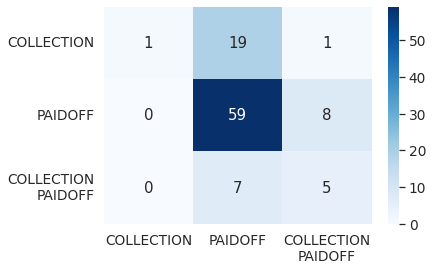

                    precision    recall  f1-score   support

COLLECTION_PAIDOFF       1.00      0.05      0.09        21
        COLLECTION       0.36      0.42      0.38        12
           PAIDOFF       0.69      0.88      0.78        67

          accuracy                           0.65       100
         macro avg       0.68      0.45      0.42       100
      weighted avg       0.72      0.65      0.59       100



In [ ]:
cm = []
for i in range(3):
    cm.append([0]*3)
y_pred = []
d = {"COLLECTION":0,"PAIDOFF":1,"COLLECTION_PAIDOFF":2}
ln = len(X_test)
approved = 0
for i in range(len(X_test)):
    pred_val = decisiontree(X_test.iloc[i])
    if y_test[i] == pred_val == "PAIDOFF":
        approved += 1
    cm[d[y_test[i]]][d[pred_val]] += 1
    y_pred.append(pred_val)
index = ["COLLECTION","PAIDOFF","COLLECTION\nPAIDOFF"]
df_cm = pd.DataFrame(cm, index, index)
sns.set(font_scale=1.25) 
sns.heatmap(df_cm, annot=True,cmap='Blues',annot_kws={"size": 15}) 
plt.show()
print(classification_report(y_test, y_pred, target_names=['COLLECTION_PAIDOFF','COLLECTION','PAIDOFF']))
acc={"Decision Tree Without Sklearn":accuracy_score(y_test,y_pred)}

In [ ]:
print("OUT OF {} LOAN REQUESTS {} LOANS WERE APPROVED".format(ln, approved))

OUT OF 100 LOAN REQUESTS 59 LOANS WERE APPROVED


# Using Sklearn Algorithms

### Function To Plot Confusion Matrix

In [ ]:
def plot_confusion_matrix(y_pred):
    index = ["COLLECTION","PAIDOFF","COLLECTION\nPAIDOFF"]
    df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred), index, index)
    sns.set(font_scale=1.25) 
    sns.heatmap(df_cm, annot=True,cmap='Blues',annot_kws={"size": 15}) 
    plt.show()

### Class Prediction Using Different ML Algorithms


In [ ]:
df = pd.read_csv('Loan payments data-1.csv')
df.Gender = df.Gender.map({'male':0,'female':1})
df.loan_status = df.loan_status.map({'PAIDOFF':1,'COLLECTION':0, 'COLLECTION_PAIDOFF':2})
df.education = df.education.map({'High School or Below':0,'Bechalor':1, 'college':2, 'Master or Above':3})
X = df[['Principal','terms','age','Gender','education']] 
y = df['loan_status'].values
X = preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
kval = {}
for i in range(1,400):
    y_pred = KNeighborsClassifier(i).fit(X_train,y_train).predict(X_test)
    kval[accuracy_score(y_test, y_pred)] = i
mxacc = kval[max(kval)]

In [ ]:
def predict_model(model):
    if model == "SVM":
        y_pred = SVC(kernel = 'linear', C = 1).fit(X_train, y_train).predict(X_test)
    elif model == "Decision Tree":
        y_pred = DecisionTreeClassifier().fit(X_train,y_train).predict(X_test)
    elif model == "Random Forest":
        y_pred = RandomForestClassifier(n_estimators=100).fit(X_train,y_train).predict(X_test)
    elif model == "Naive Bayes":
        y_pred = GaussianNB().fit(X_train, y_train).predict(X_test)
    elif model == "Logistic Regression":
        y_pred = LogisticRegression(random_state=0, multi_class='multinomial').fit(X_train, y_train).predict(X_test)
    elif model == "KNN":
        y_pred = KNeighborsClassifier(mxacc).fit(X_train,y_train).predict(X_test)
    plot_confusion_matrix(y_pred)
    print('\nClassification Report\n')
    print(classification_report(y_test, y_pred, target_names=['COLLECTION_PAIDOFF','COLLECTION','PAIDOFF']))
    return y_pred

### Confusion matrix and Classification report

ALGORITHMS DONE USING SKLEARN

Model- Decision Tree


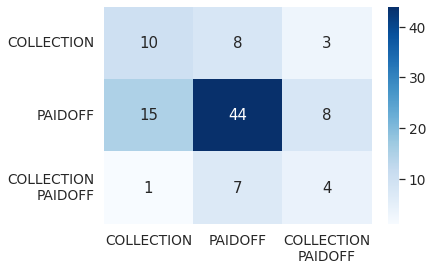


Classification Report

                    precision    recall  f1-score   support

COLLECTION_PAIDOFF       0.38      0.48      0.43        21
        COLLECTION       0.75      0.66      0.70        67
           PAIDOFF       0.27      0.33      0.30        12

          accuracy                           0.58       100
         macro avg       0.47      0.49      0.47       100
      weighted avg       0.61      0.58      0.59       100

Model- SVM


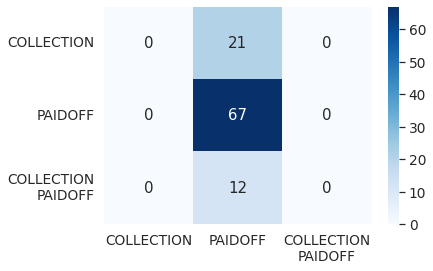


Classification Report

                    precision    recall  f1-score   support

COLLECTION_PAIDOFF       0.00      0.00      0.00        21
        COLLECTION       0.67      1.00      0.80        67
           PAIDOFF       0.00      0.00      0.00        12

          accuracy                           0.67       100
         macro avg       0.22      0.33      0.27       100
      weighted avg       0.45      0.67      0.54       100

Model- KNN


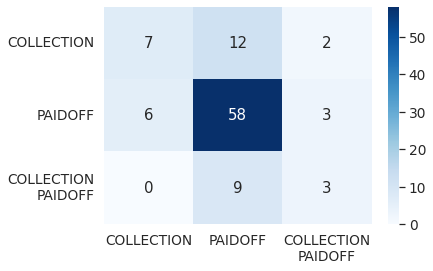


Classification Report

                    precision    recall  f1-score   support

COLLECTION_PAIDOFF       0.54      0.33      0.41        21
        COLLECTION       0.73      0.87      0.79        67
           PAIDOFF       0.38      0.25      0.30        12

          accuracy                           0.68       100
         macro avg       0.55      0.48      0.50       100
      weighted avg       0.65      0.68      0.65       100

Model- Random Forest


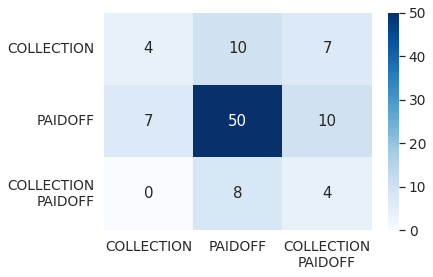


Classification Report

                    precision    recall  f1-score   support

COLLECTION_PAIDOFF       0.36      0.19      0.25        21
        COLLECTION       0.74      0.75      0.74        67
           PAIDOFF       0.19      0.33      0.24        12

          accuracy                           0.58       100
         macro avg       0.43      0.42      0.41       100
      weighted avg       0.59      0.58      0.58       100

Model- Naive Bayes


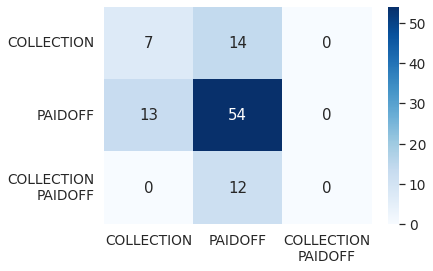


Classification Report

                    precision    recall  f1-score   support

COLLECTION_PAIDOFF       0.35      0.33      0.34        21
        COLLECTION       0.68      0.81      0.73        67
           PAIDOFF       0.00      0.00      0.00        12

          accuracy                           0.61       100
         macro avg       0.34      0.38      0.36       100
      weighted avg       0.53      0.61      0.56       100

Model- Logistic Regression


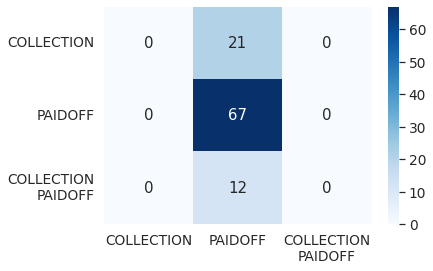


Classification Report

                    precision    recall  f1-score   support

COLLECTION_PAIDOFF       0.00      0.00      0.00        21
        COLLECTION       0.67      1.00      0.80        67
           PAIDOFF       0.00      0.00      0.00        12

          accuracy                           0.67       100
         macro avg       0.22      0.33      0.27       100
      weighted avg       0.45      0.67      0.54       100



In [ ]:
print("ALGORITHMS DONE USING SKLEARN\n")
models = ["Decision Tree","SVM","KNN","Random Forest","Naive Bayes","Logistic Regression"]
for i in models:
    print("Model-",i)
    acc[i] = accuracy_score(y_test,predict_model(i))

In [ ]:
acc = sorted(acc.items(), key=lambda x: x[1])[::-1]
acc

[('KNN', 0.68),
 ('Logistic Regression', 0.67),
 ('SVM', 0.67),
 ('Decision Tree Without Sklearn', 0.65),
 ('Naive Bayes', 0.61),
 ('Random Forest', 0.58),
 ('Decision Tree', 0.58)]

### Accuracy Table

In [ ]:
acc_df = pd.DataFrame(acc, columns =['Algorithm','Accuracy'])
acc_df

,Algorithm,Accuracy
0,KNN,0.68
1,Logistic Regression,0.67
2,SVM,0.67
3,Decision Tree Without Sklearn,0.65
4,Naive Bayes,0.61
5,Random Forest,0.58
6,Decision Tree,0.58


### Alogorithm-Accuracy Bar plot

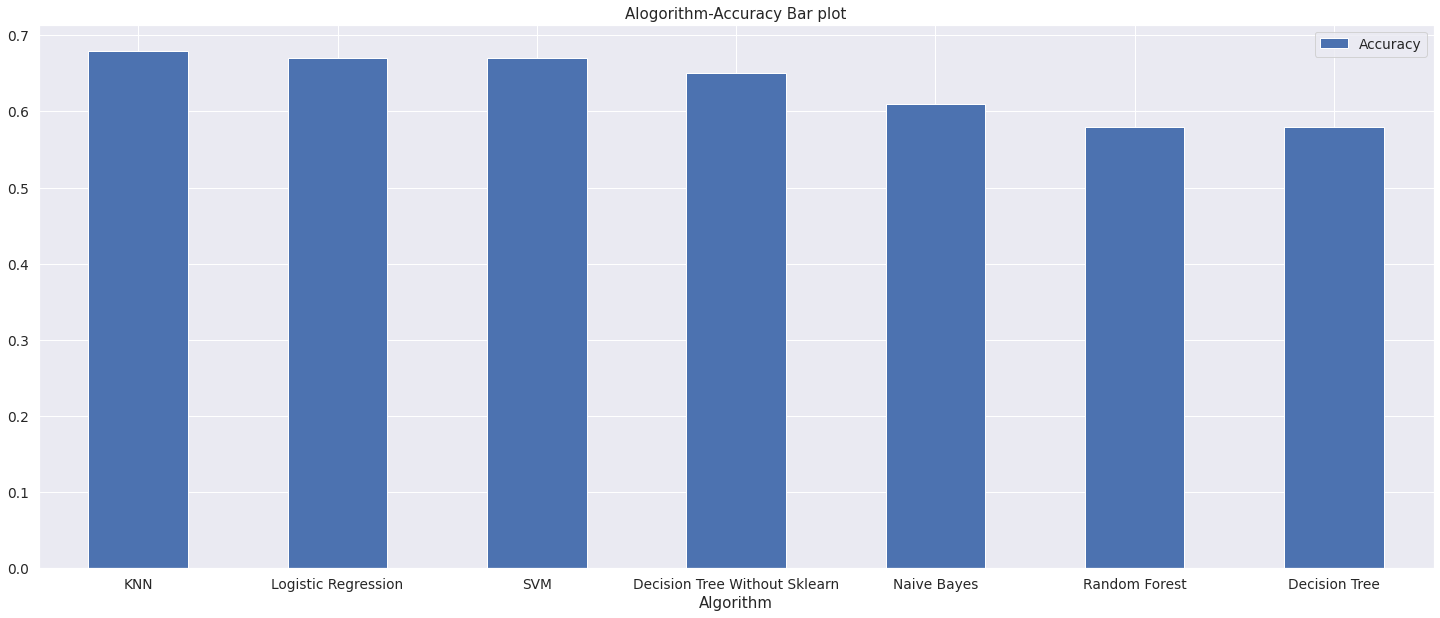

In [ ]:
acc_df.plot.bar(x='Algorithm', y='Accuracy', rot=0, figsize=(25, 10))
plt.title("Alogorithm-Accuracy Bar plot")
plt.show()

# Conclusion

#### We can conclude that the best accuracy obtained is 68% and is obtained using KNN that is implemented from sklearn
